In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df=pd.read_csv(r"C:\Users\santo\OneDrive\Desktop\Velocity\CSV Files\BreastCancer - BreastCancer.csv")

In [3]:
pd.options.display.max_columns=1000

In [4]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
442,90944601,B,13.78,15.79,88.37,585.9,0.08817,0.06718,0.01055,0.009937,0.1405,0.05848,0.3563,0.4833,2.235,29.34,0.006432,0.011560,0.007741,0.005657,0.01227,0.002564,15.27,17.50,97.90,706.6,0.1072,0.1071,0.03517,0.03312,0.1859,0.06810
76,8610629,B,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.065560,0.2403,0.06641,0.4101,1.0140,2.652,32.65,0.013400,0.028390,0.011620,0.008239,0.02572,0.006164,14.08,12.49,91.36,605.5,0.1451,0.1379,0.08539,0.07407,0.2710,0.07191
184,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.032630,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.013950,0.017740,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
256,88649001,M,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.114400,0.1893,0.06232,0.8426,1.1990,7.158,106.40,0.006356,0.047650,0.038630,0.015190,0.01936,0.005252,25.05,36.27,178.60,1926.0,0.1281,0.5329,0.42510,0.19410,0.2818,0.10050
186,874217,M,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.058140,0.1621,0.05425,0.2577,0.4757,1.817,28.92,0.002866,0.009181,0.014120,0.006719,0.01069,0.001087,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206,0.06938


In [5]:
df["diagnosis"]=df["diagnosis"].map({"B":0,"M":1})

In [6]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
130,866714,0,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,0.2005,0.8163,1.973,15.24,0.006773,0.02456,0.01018,0.008094,0.02662,0.004143,13.34,17.81,91.38,545.2,0.1427,0.25850,0.09915,0.08187,0.3469,0.09241
207,879830,1,17.01,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.05223,0.5858,0.8554,4.106,68.46,0.005038,0.01503,0.01946,0.011230,0.02294,0.002581,19.80,25.05,130.00,1210.0,0.1111,0.14860,0.19320,0.10960,0.3275,0.06469
216,8811523,0,11.89,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,0.06314,0.2963,1.5630,2.087,21.46,0.008872,0.04192,0.05946,0.017850,0.02793,0.004775,13.25,27.10,86.20,531.2,0.1405,0.30460,0.28060,0.11380,0.3397,0.08365
542,921644,0,14.74,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,0.3031,1.3850,2.177,27.41,0.004775,0.01172,0.01947,0.012690,0.01870,0.002626,16.51,32.29,107.40,826.4,0.1060,0.13760,0.16110,0.10950,0.2722,0.06956
299,892399,0,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,0.2868,1.1430,2.289,20.56,0.010170,0.01443,0.01861,0.012500,0.03464,0.001971,10.93,24.22,70.10,362.7,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777


In [7]:
df=df.drop(columns="id")

In [8]:
df.shape

(569, 31)

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

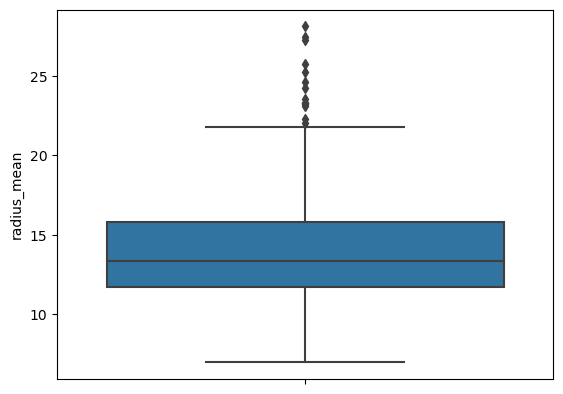

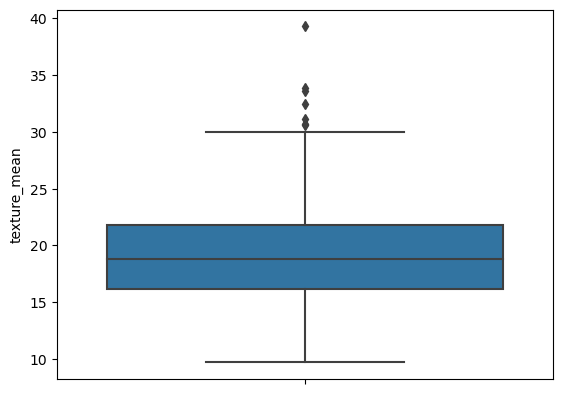

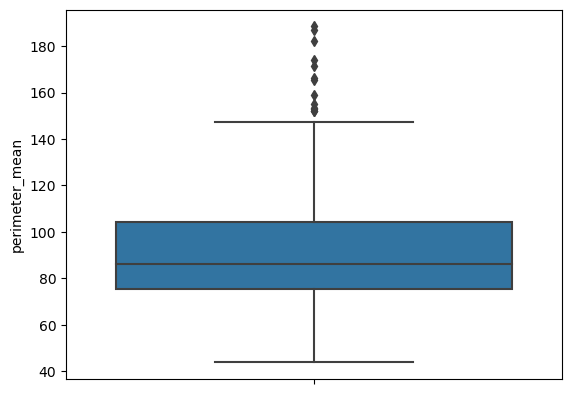

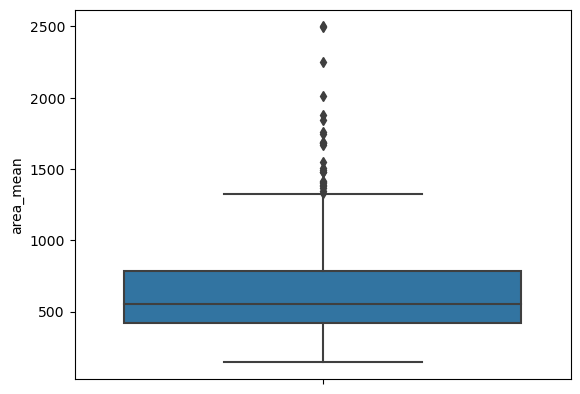

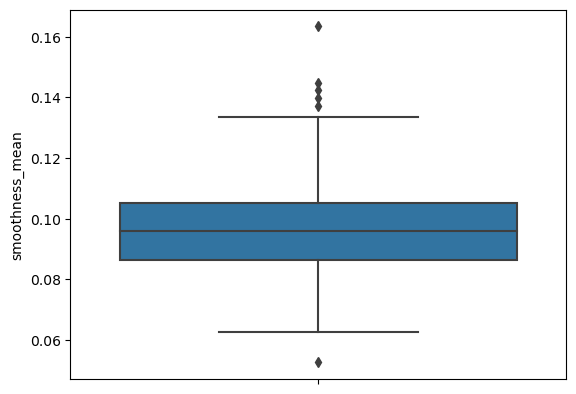

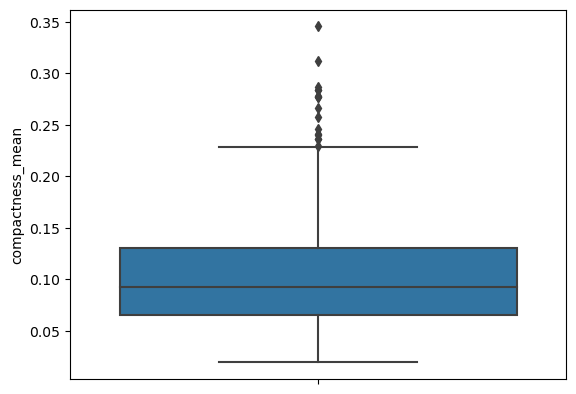

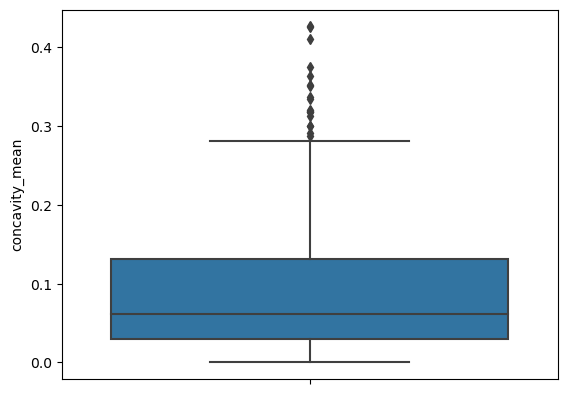

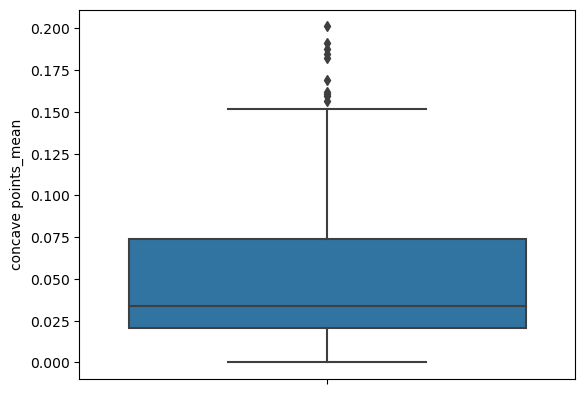

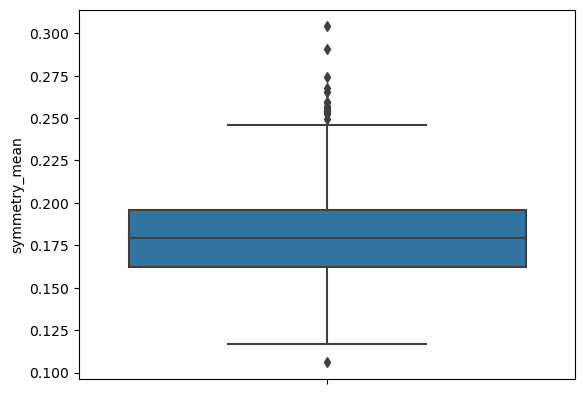

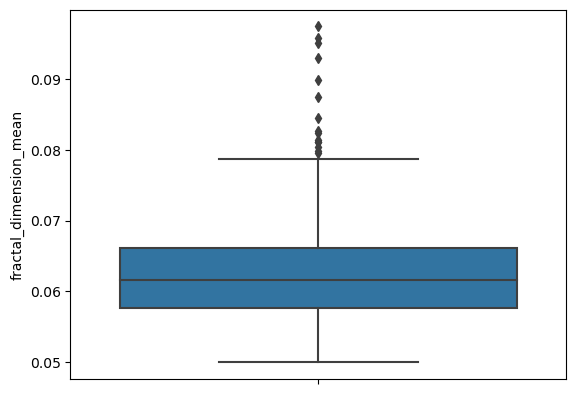

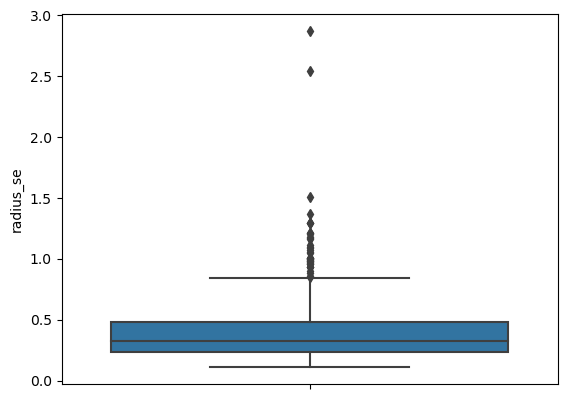

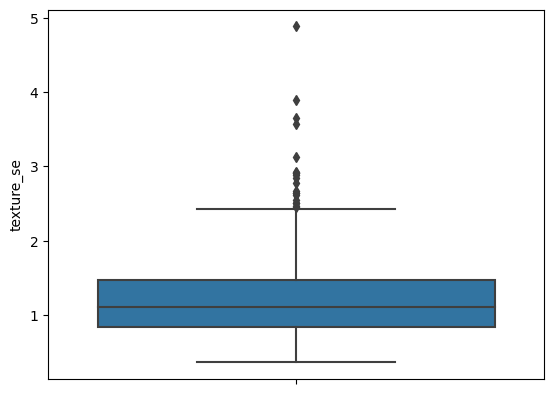

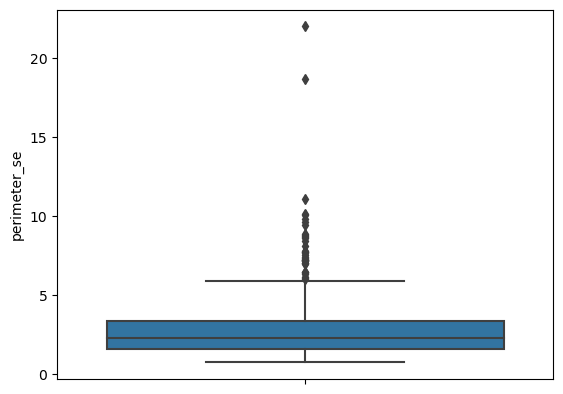

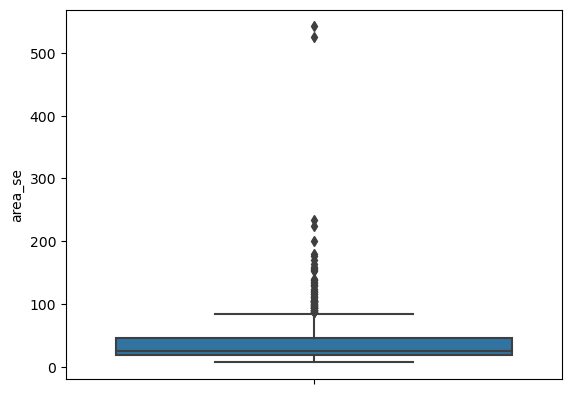

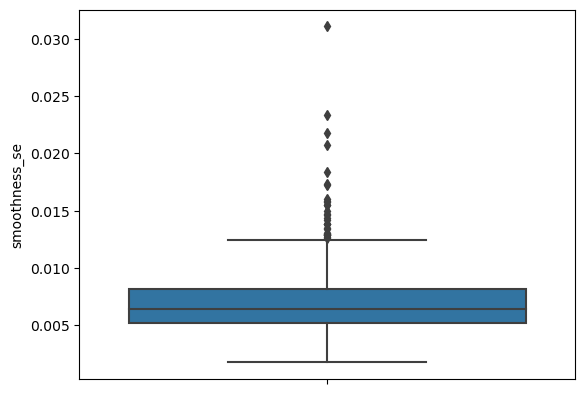

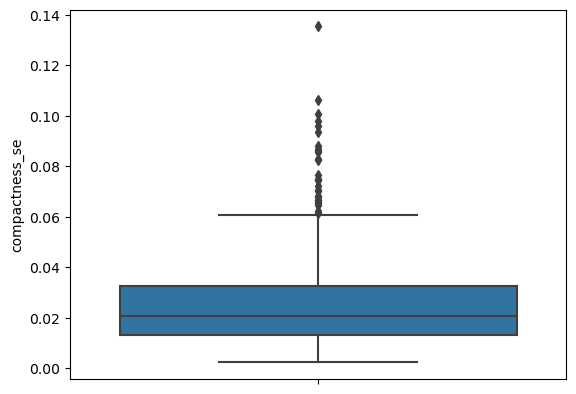

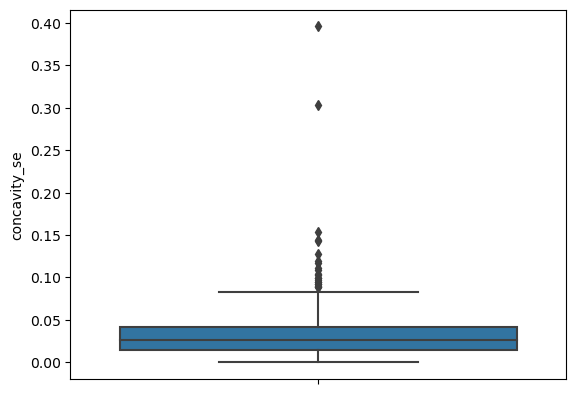

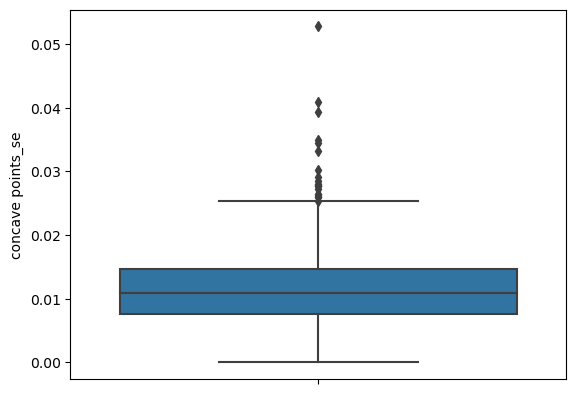

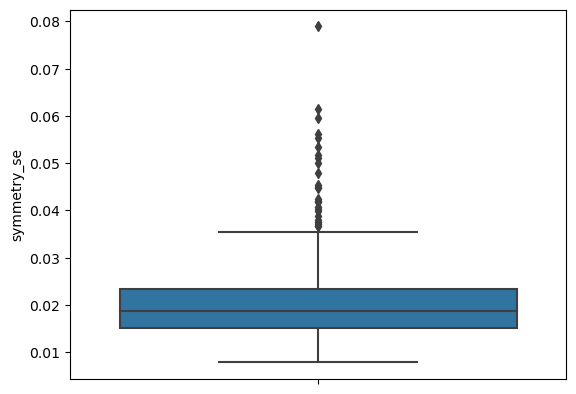

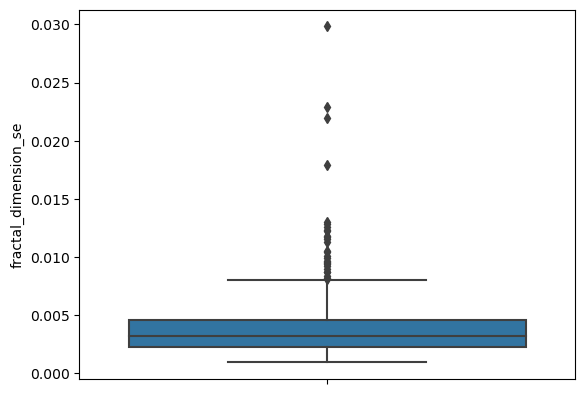

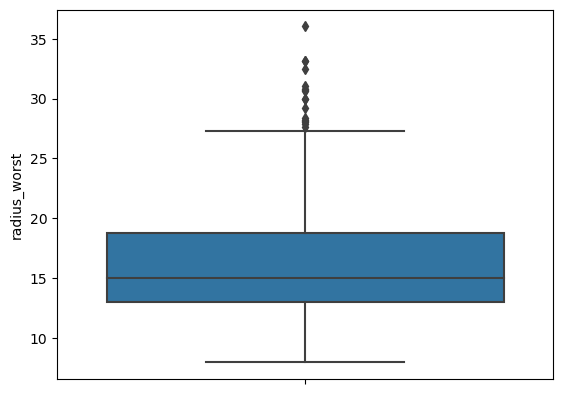

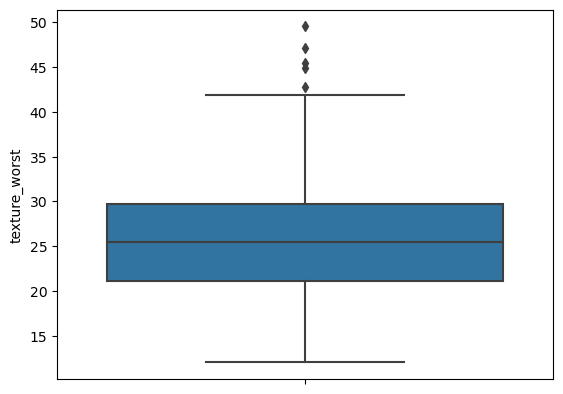

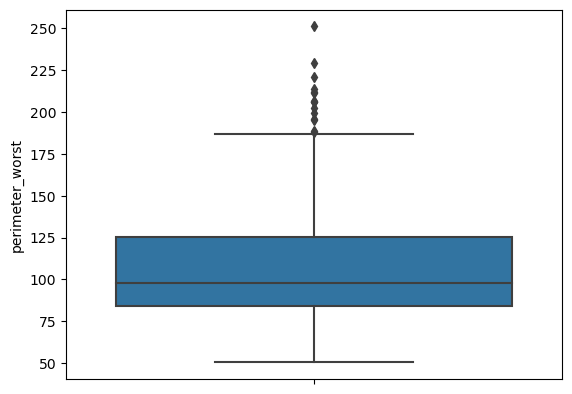

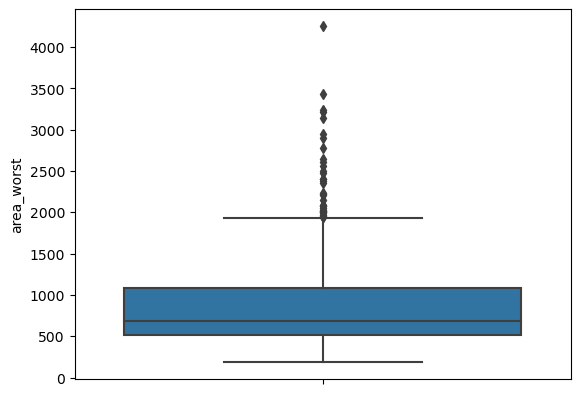

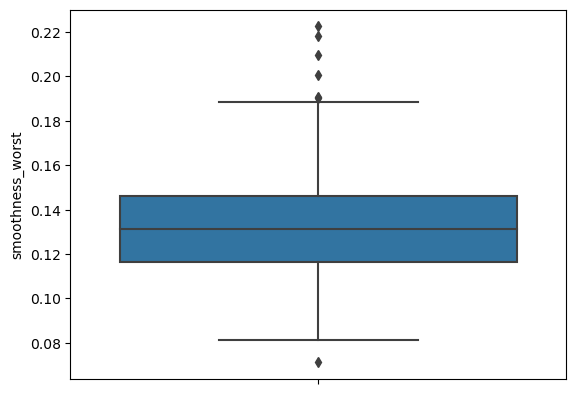

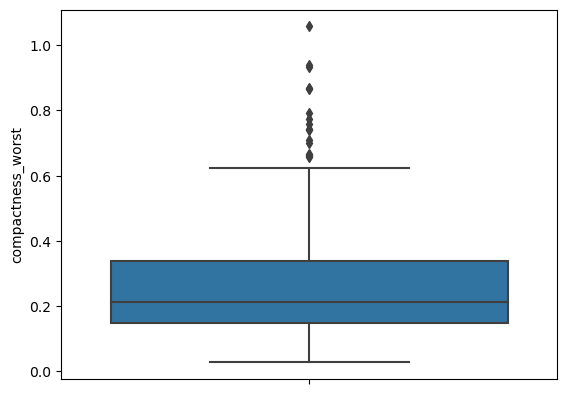

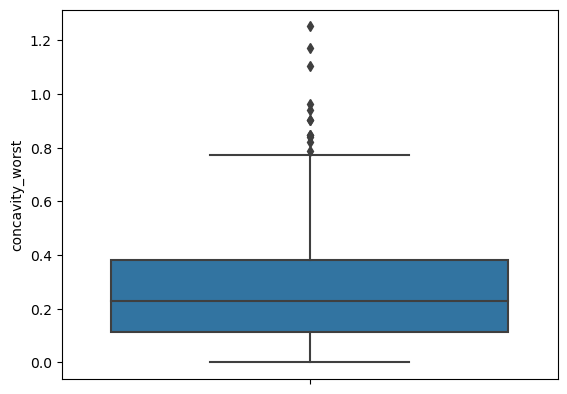

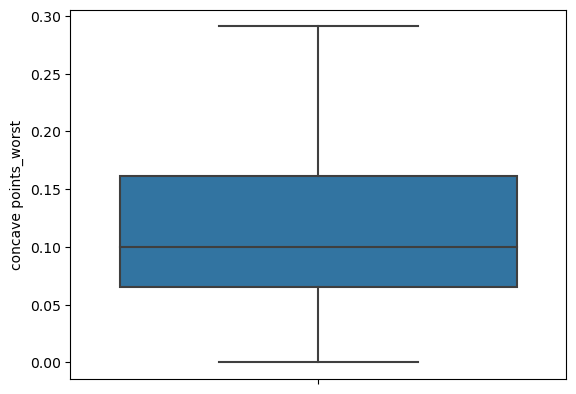

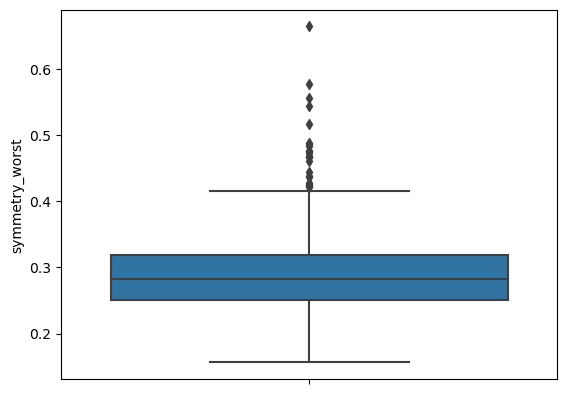

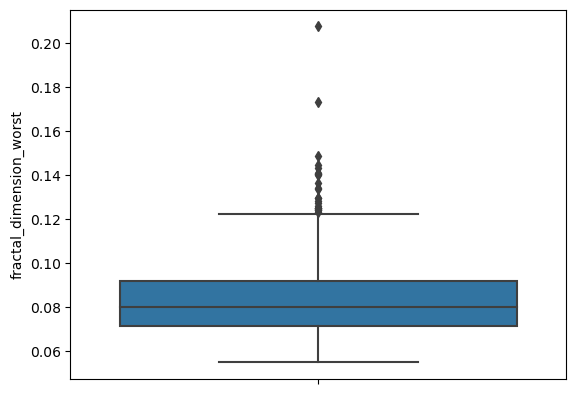

In [15]:
for i,j in df.items():
    if i != "diagnosis":
        sns.boxplot(y=i,data=df)
        plt.show()

In [16]:
#triming
lower_bound=df["radius_se"].mean()- 3*(df["radius_se"].std())
Upper_bound=df["radius_se"].mean()+ 3*(df["radius_se"].std())
df=df[(df["radius_se"]<Upper_bound) & (df["radius_se"]>lower_bound)]

lower_bound=df["texture_se"].mean()- 3*(df["texture_se"].std())
Upper_bound=df["texture_se"].mean()+ 3*(df["texture_se"].std())
df=df[(df["texture_se"]<Upper_bound) & (df["texture_se"]>lower_bound)]

lower_bound=df["perimeter_se"].mean()- 3*(df["perimeter_se"].std())
Upper_bound=df["perimeter_se"].mean()+ 3*(df["perimeter_se"].std())
df=df[(df["perimeter_se"]<Upper_bound) & (df["perimeter_se"]>lower_bound)]

lower_bound=df["area_se"].mean()- 3*(df["area_se"].std())
Upper_bound=df["area_se"].mean()+ 3*(df["area_se"].std())
df=df[(df["area_se"]<Upper_bound) & (df["area_se"]>lower_bound)]

lower_bound=df["smoothness_se"].mean()- 3*(df["smoothness_se"].std())
Upper_bound=df["smoothness_se"].mean()+ 3*(df["smoothness_se"].std())
df=df[(df["smoothness_se"]<Upper_bound) & (df["smoothness_se"]>lower_bound)]

lower_bound=df["compactness_se"].mean()- 3*(df["compactness_se"].std())
Upper_bound=df["compactness_se"].mean()+ 3*(df["compactness_se"].std())
df=df[(df["compactness_se"]<Upper_bound) & (df["compactness_se"]>lower_bound)]

lower_bound=df["concavity_se"].mean()- 3*(df["concavity_se"].std())
Upper_bound=df["concavity_se"].mean()+ 3*(df["concavity_se"].std())
df=df[(df["concavity_se"]<Upper_bound) & (df["concavity_se"]>lower_bound)]

lower_bound=df["concave points_se"].mean()- 3*(df["concave points_se"].std())
Upper_bound=df["concave points_se"].mean()+ 3*(df["concave points_se"].std())
df=df[(df["concave points_se"]<Upper_bound) & (df["concave points_se"]>lower_bound)]

lower_bound=df["symmetry_se"].mean()- 3*(df["symmetry_se"].std())
Upper_bound=df["symmetry_se"].mean()+ 3*(df["symmetry_se"].std())
df=df[(df["symmetry_se"]<Upper_bound) & (df["symmetry_se"]>lower_bound)]

lower_bound=df["fractal_dimension_se"].mean()- 3*(df["fractal_dimension_se"].std())
Upper_bound=df["fractal_dimension_se"].mean()+ 3*(df["fractal_dimension_se"].std())
df=df[(df["fractal_dimension_se"]<Upper_bound) & (df["fractal_dimension_se"]>lower_bound)]

lower_bound=df["area_worst"].mean()- 3*(df["area_worst"].std())
Upper_bound=df["area_worst"].mean()+ 3*(df["area_worst"].std())
df=df[(df["area_worst"]<Upper_bound) & (df["area_worst"]>lower_bound)]

lower_bound=df["compactness_worst"].mean()- 3*(df["compactness_worst"].std())
Upper_bound=df["compactness_worst"].mean()+ 3*(df["compactness_worst"].std())
df=df[(df["compactness_worst"]<Upper_bound) & (df["compactness_worst"]>lower_bound)]

lower_bound=df["concavity_worst"].mean()- 3*(df["concavity_worst"].std())
Upper_bound=df["concavity_worst"].mean()+ 3*(df["concavity_worst"].std())
df=df[(df["concavity_worst"]<Upper_bound) & (df["concavity_worst"]>lower_bound)]

lower_bound=df["symmetry_worst"].mean()- 3*(df["symmetry_worst"].std())
Upper_bound=df["symmetry_worst"].mean()+ 3*(df["symmetry_worst"].std())
df=df[(df["symmetry_worst"]<Upper_bound) & (df["symmetry_worst"]>lower_bound)]

lower_bound=df["fractal_dimension_worst"].mean()- 3*(df["fractal_dimension_worst"].std())
Upper_bound=df["fractal_dimension_worst"].mean()+ 3*(df["fractal_dimension_worst"].std())
df=df[(df["fractal_dimension_worst"]<Upper_bound) & (df["fractal_dimension_worst"]>lower_bound)]

In [17]:
for i in [ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_worst'
        , 'texture_worst',
       'perimeter_worst','smoothness_worst']:
    percentile_25=df[i].quantile(0.25)
    percentile_75=df[i].quantile(0.75)
    IQR= percentile_75- percentile_25
    upper_limit=percentile_75+1.5*IQR
    lower_limit=percentile_25-1.5*IQR
    df[i]=np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,19.93,17.77,131.075,1090.425,0.084740,0.07864,0.08690,0.070170,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.535,23.41,158.5725,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.000,1090.425,0.109600,0.15990,0.19740,0.115582,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.535,25.53,152.5000,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
4,1,19.93,14.34,131.075,1090.425,0.100300,0.13280,0.19800,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.2000,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
6,1,18.25,19.98,119.600,1040.000,0.094630,0.10900,0.11270,0.074000,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.880,27.66,153.2000,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.200,577.900,0.118900,0.16450,0.09366,0.059850,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.060,28.14,110.6000,897.0,0.16540,0.36820,0.2678,0.1556,0.3196,0.11510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,14.59,22.68,96.390,657.100,0.084730,0.13300,0.10290,0.037360,0.1454,0.06147,0.2254,1.1080,2.224,19.54,0.004242,0.04639,0.06578,0.01606,0.01638,0.004406,15.480,27.27,105.9000,733.5,0.10260,0.31710,0.3662,0.1105,0.2258,0.08004
560,0,14.05,27.15,91.380,600.400,0.099290,0.11260,0.04462,0.043040,0.1537,0.06171,0.3645,1.4920,2.888,29.84,0.007256,0.02678,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.2000,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
565,1,19.93,28.25,131.075,1090.425,0.097800,0.10340,0.14400,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.535,38.25,155.0000,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.300,858.100,0.084550,0.10230,0.09251,0.053020,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.7000,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


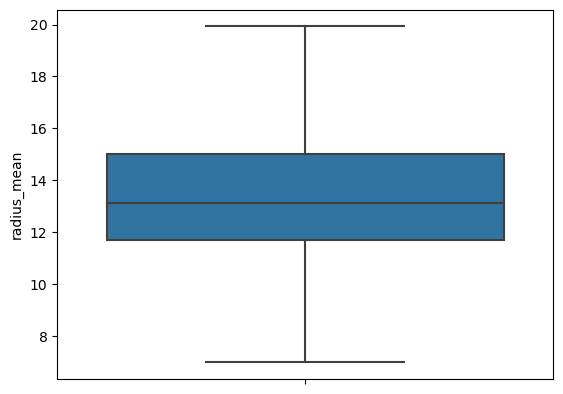

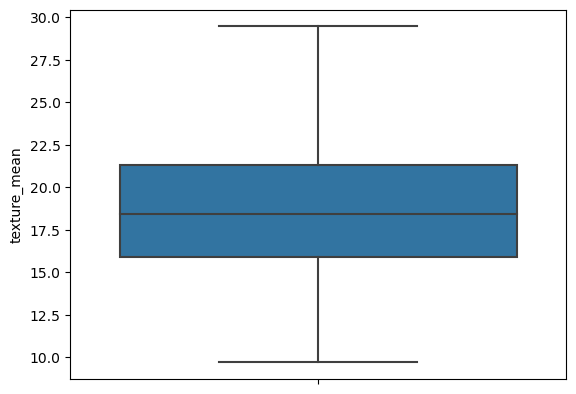

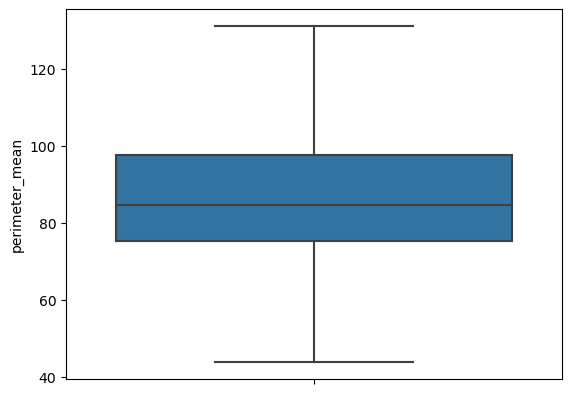

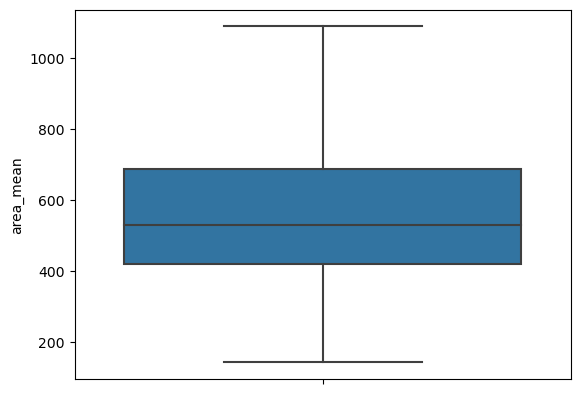

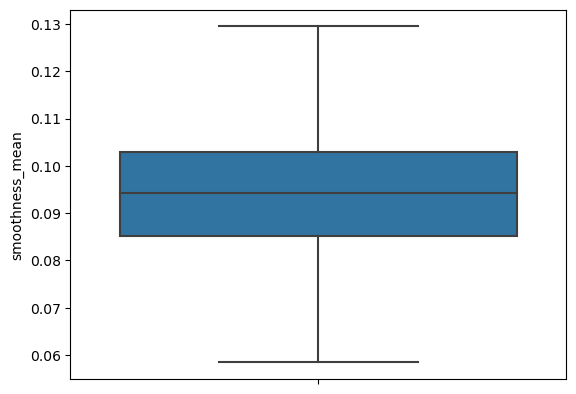

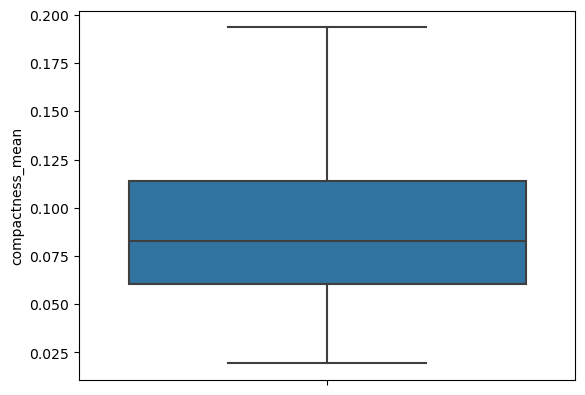

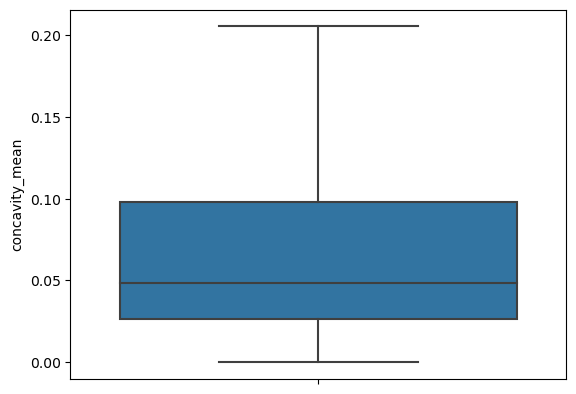

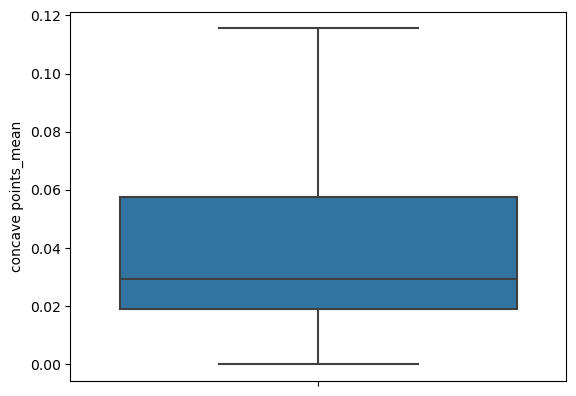

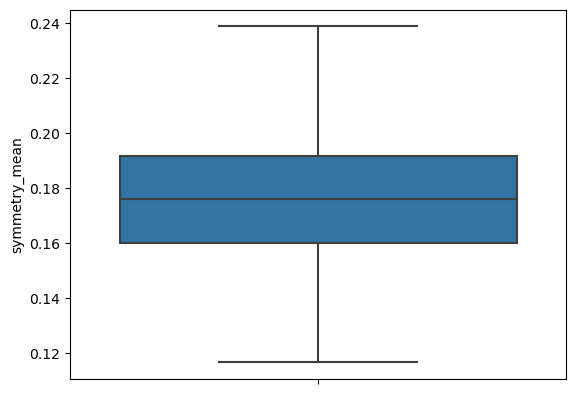

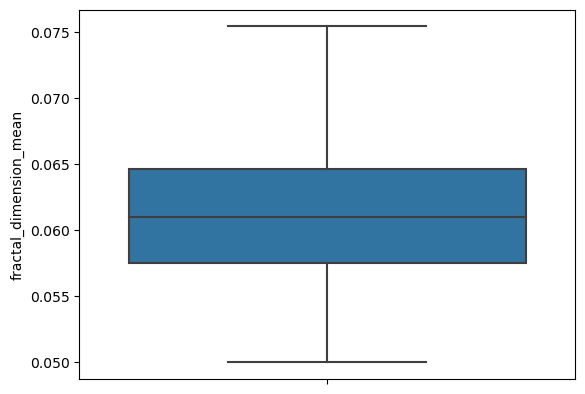

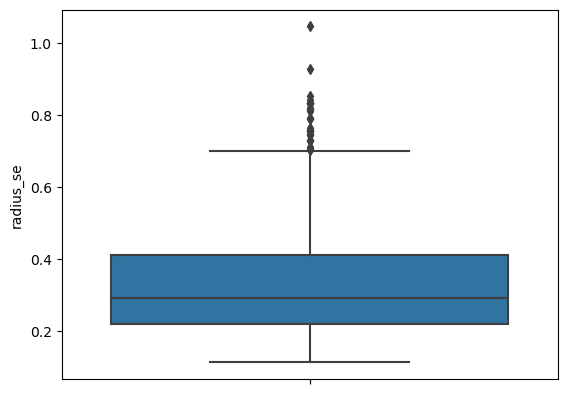

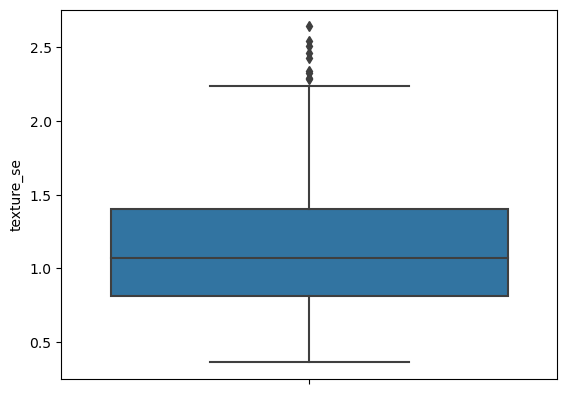

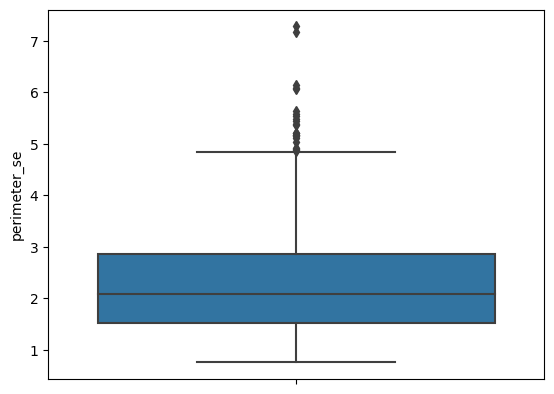

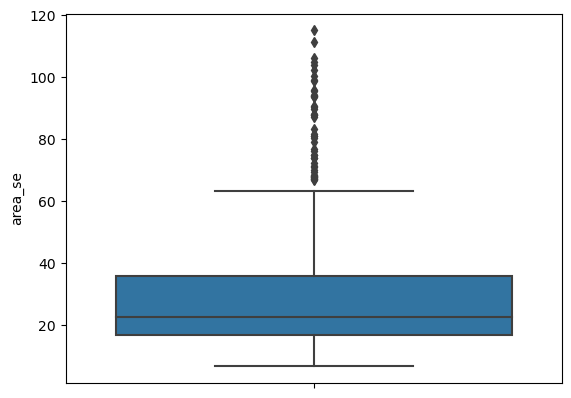

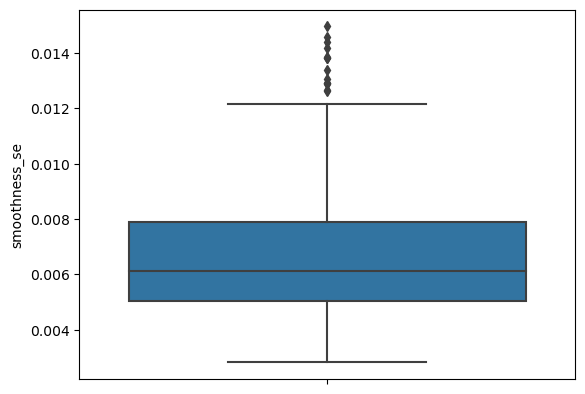

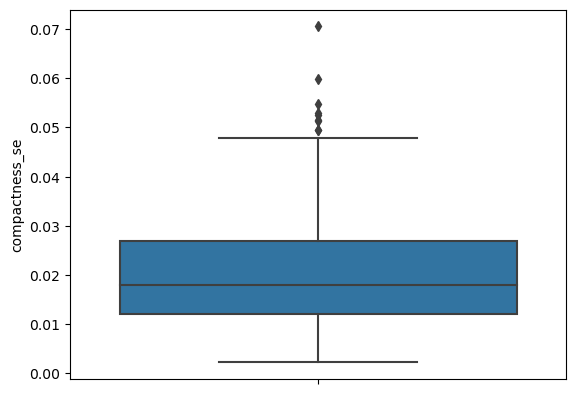

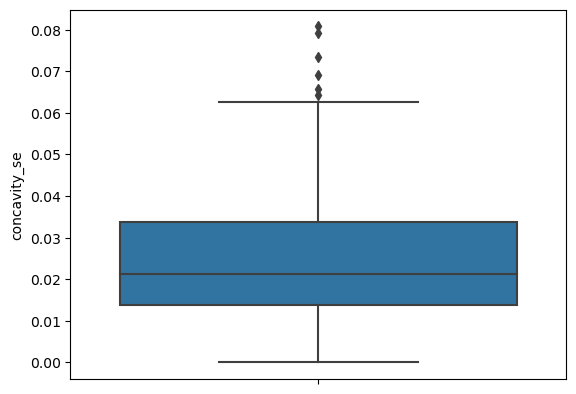

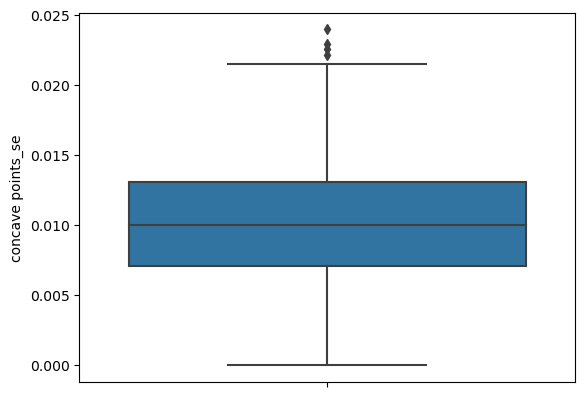

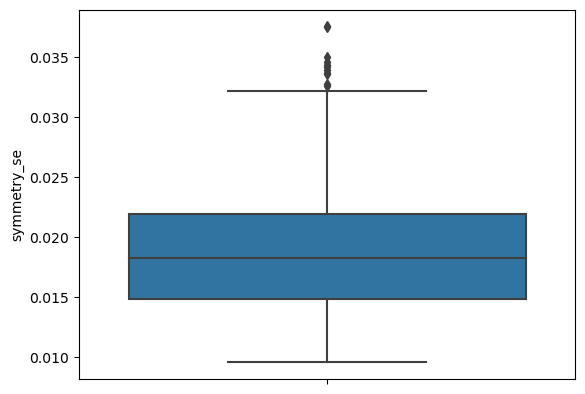

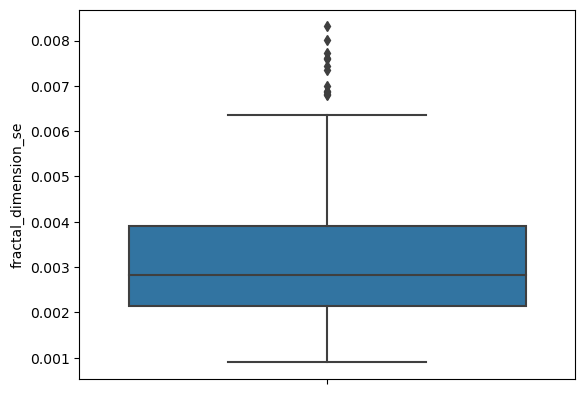

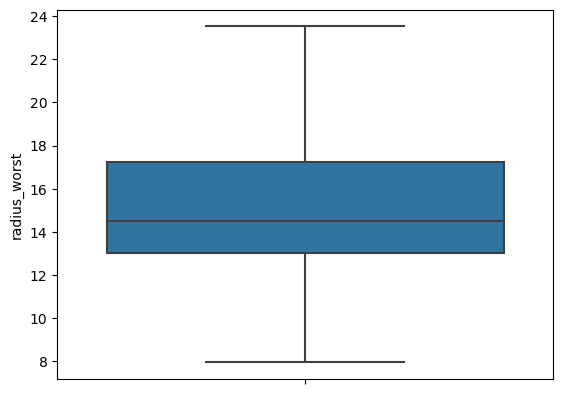

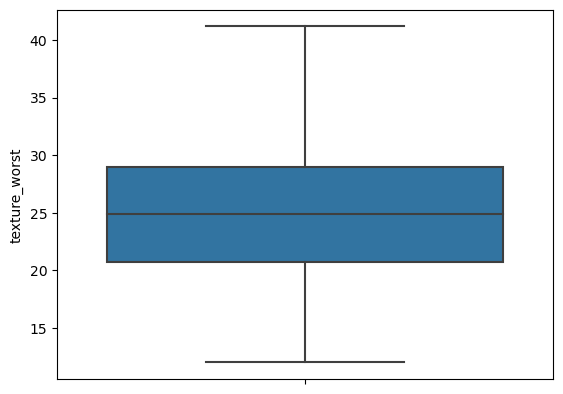

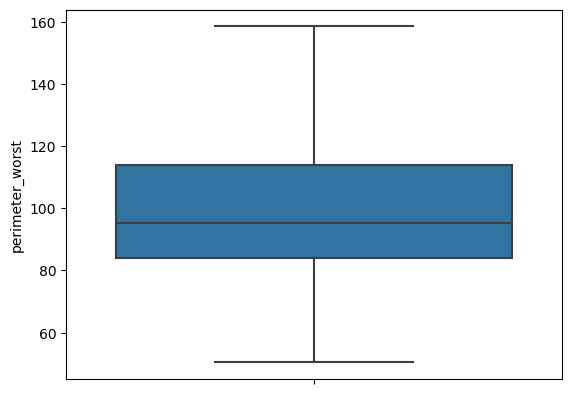

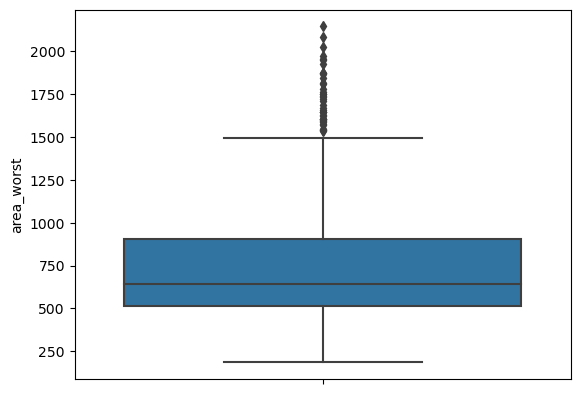

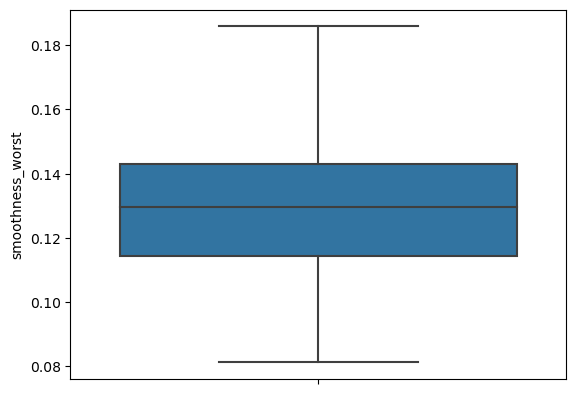

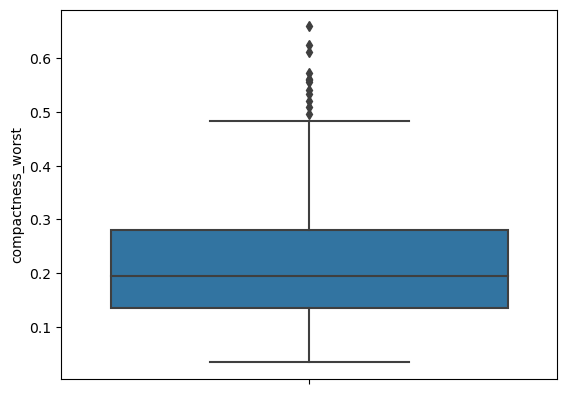

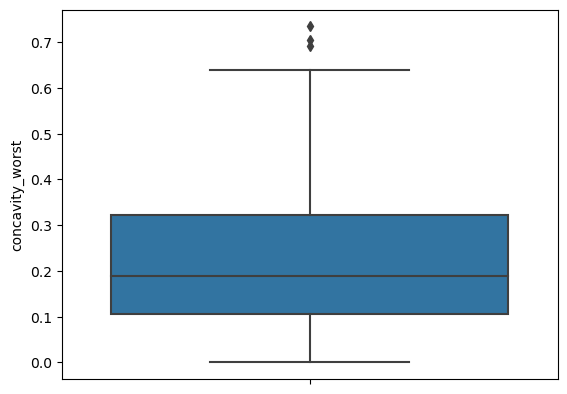

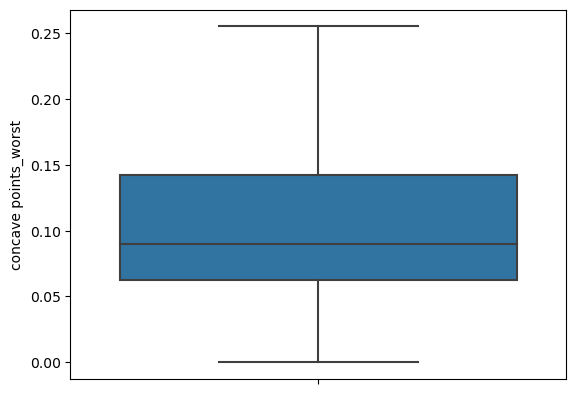

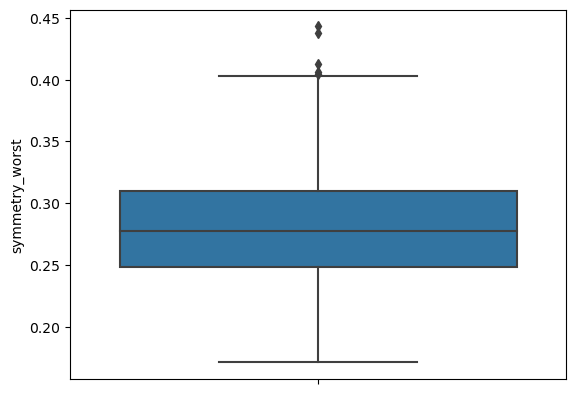

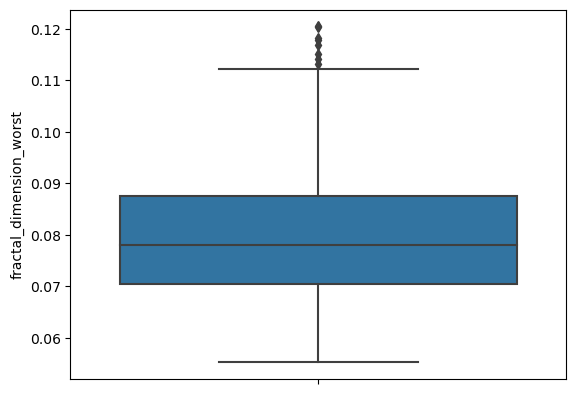

In [18]:
for i,j in df.items():
    if i != "diagnosis":
        sns.boxplot(y=i,data=df)
        plt.show()

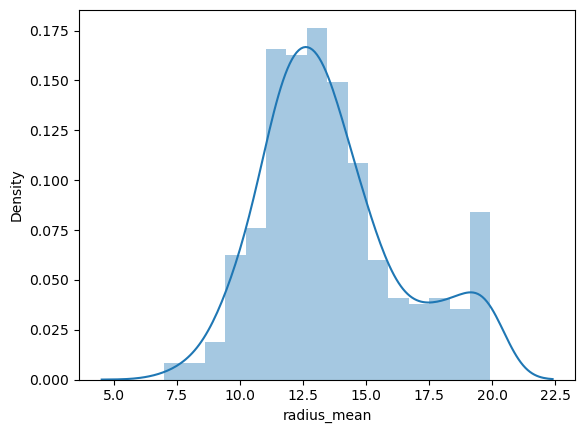

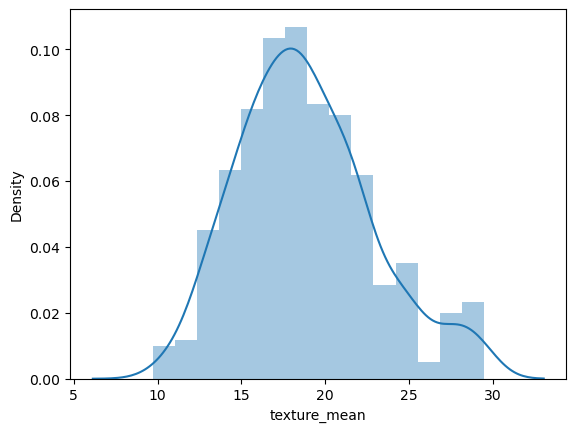

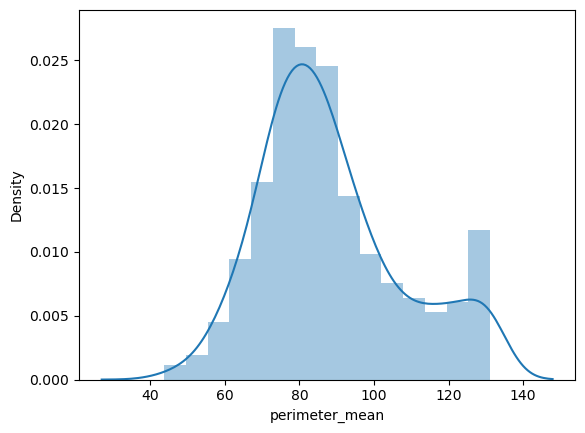

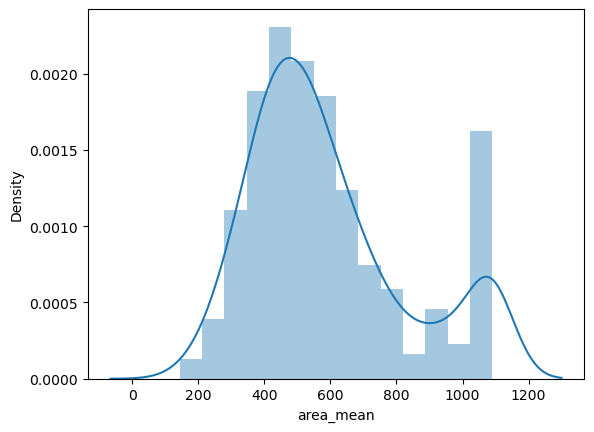

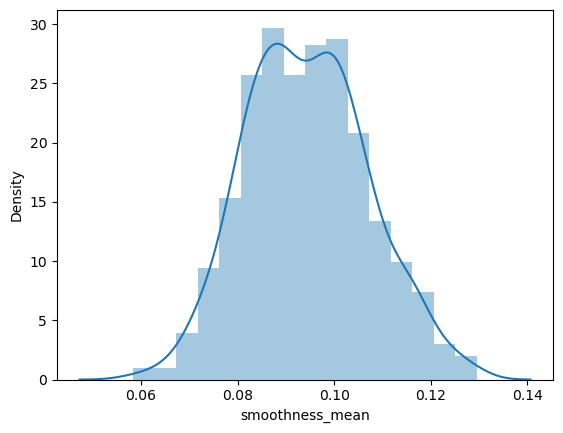

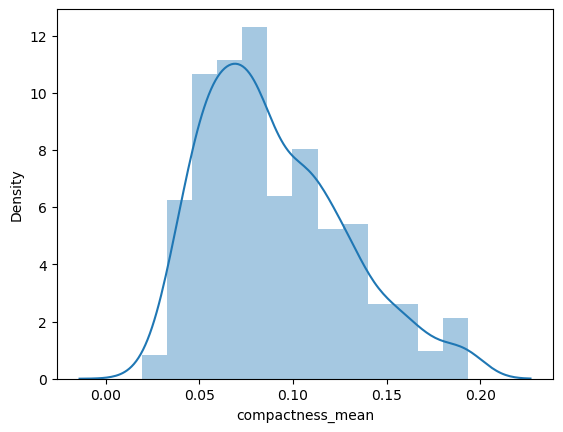

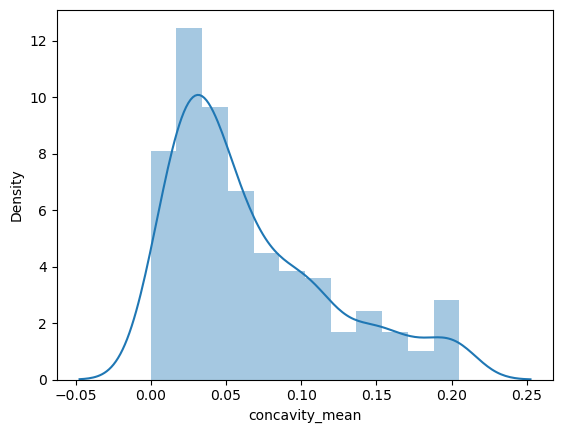

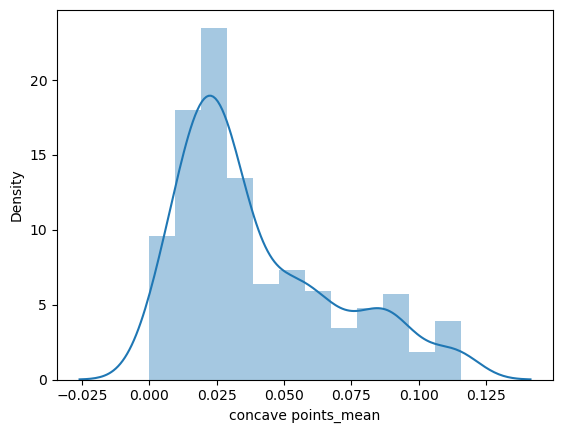

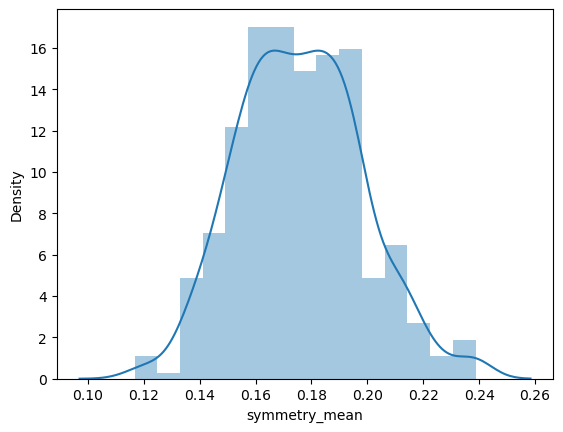

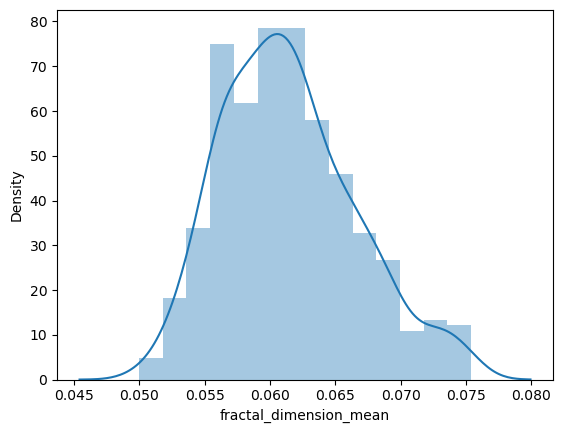

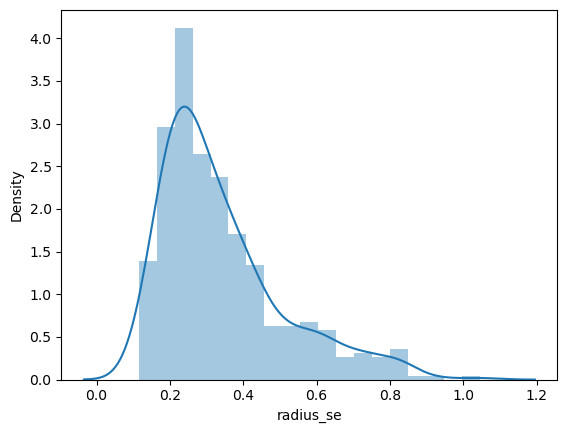

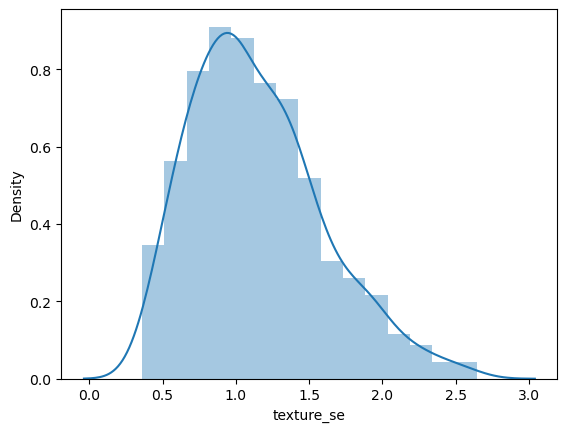

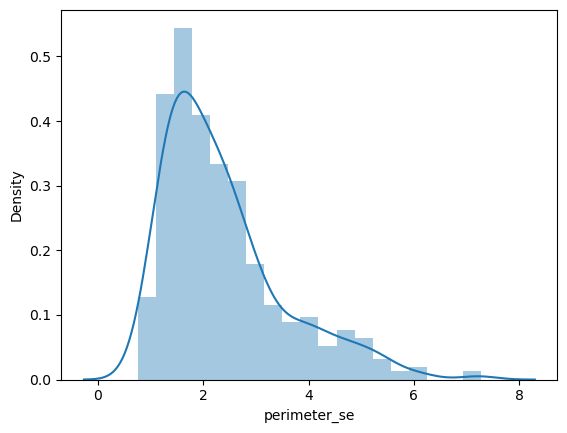

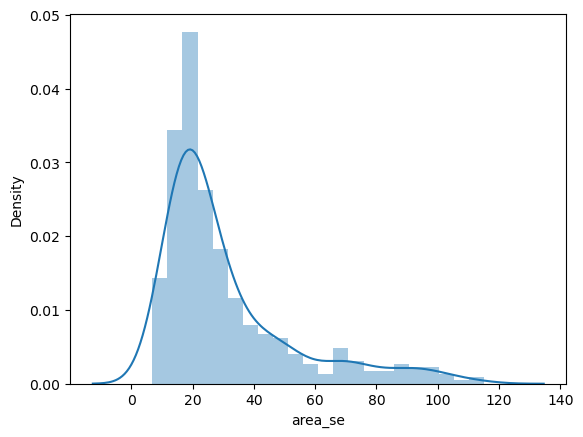

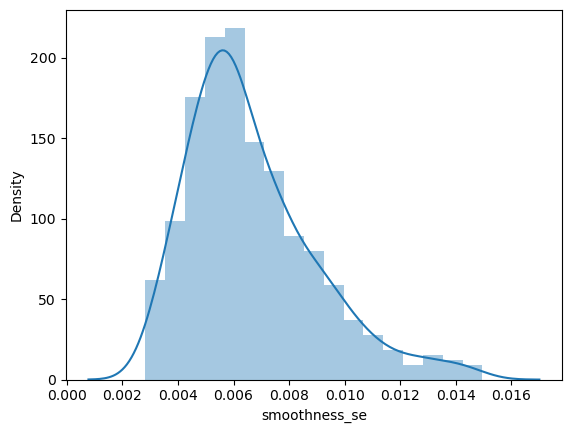

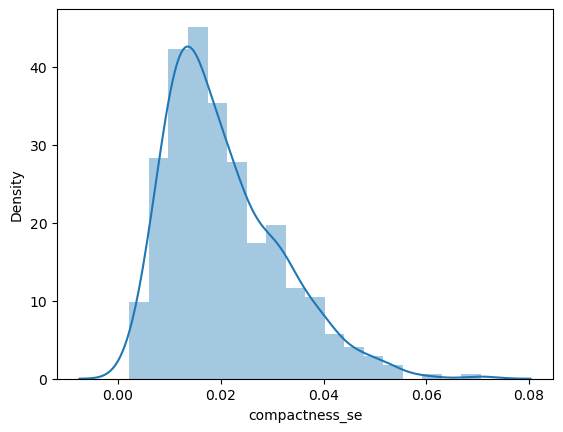

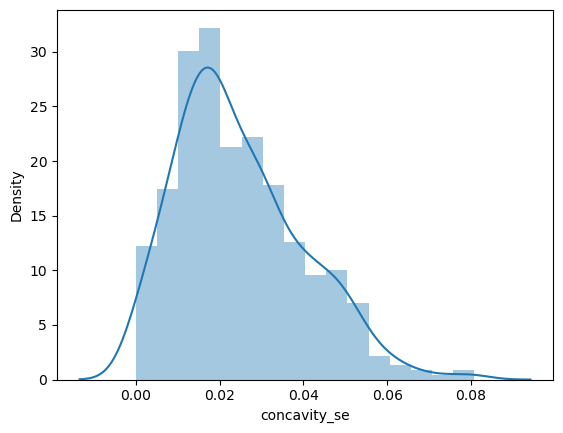

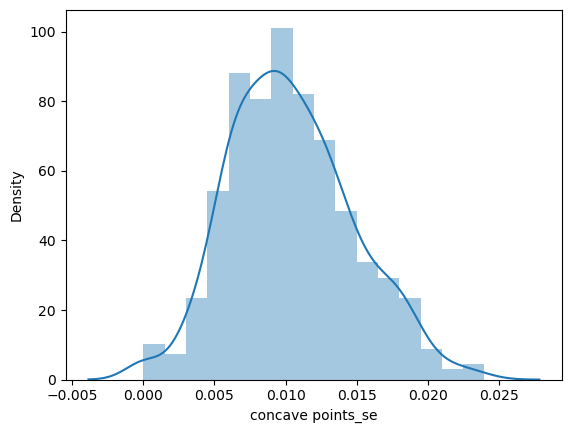

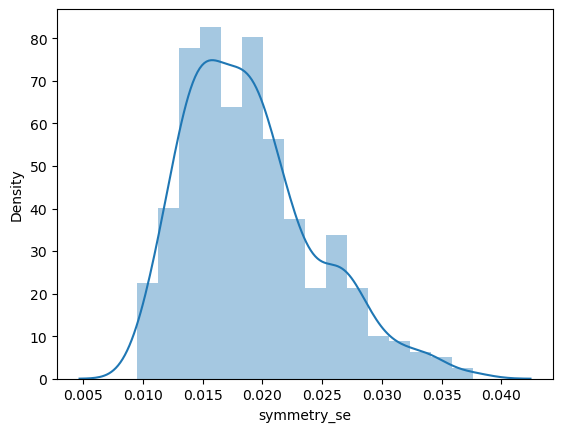

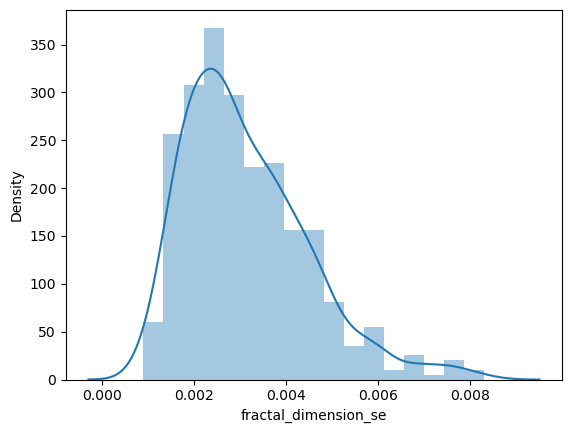

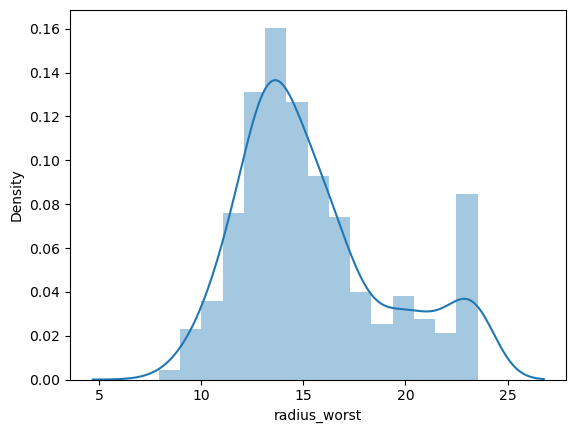

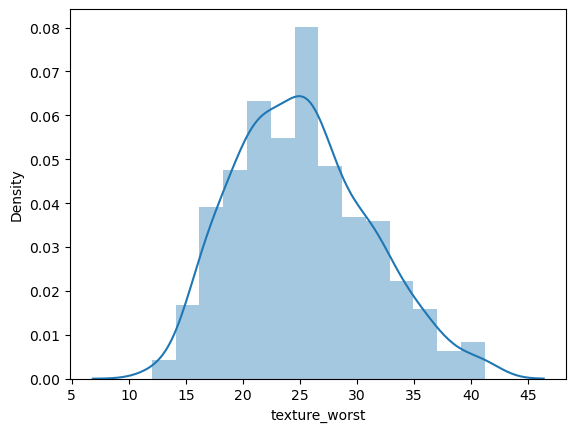

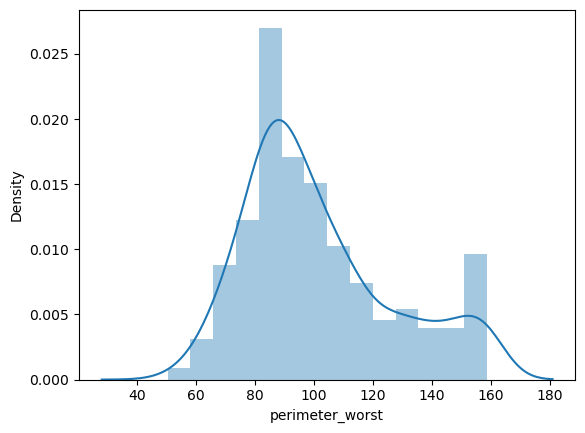

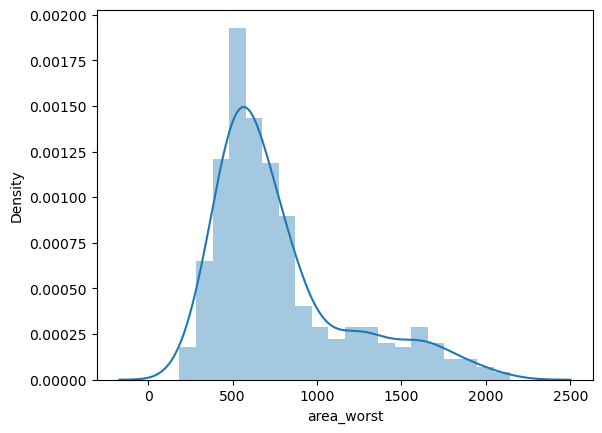

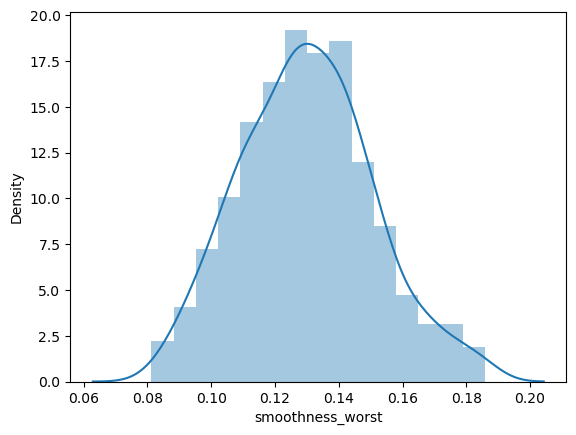

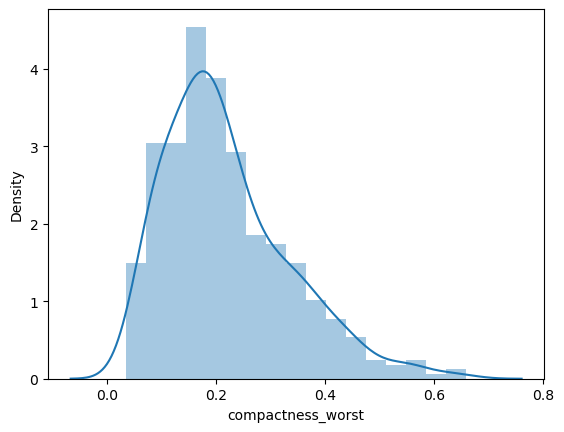

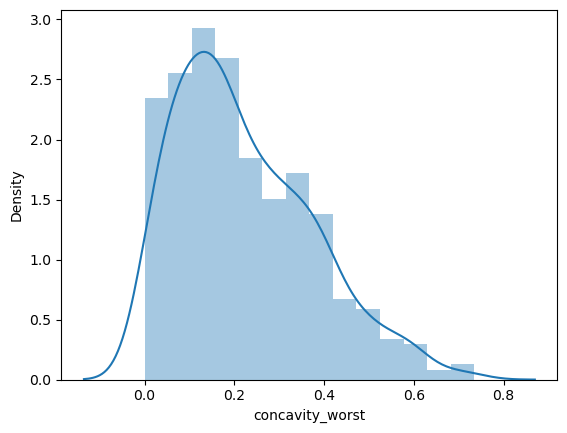

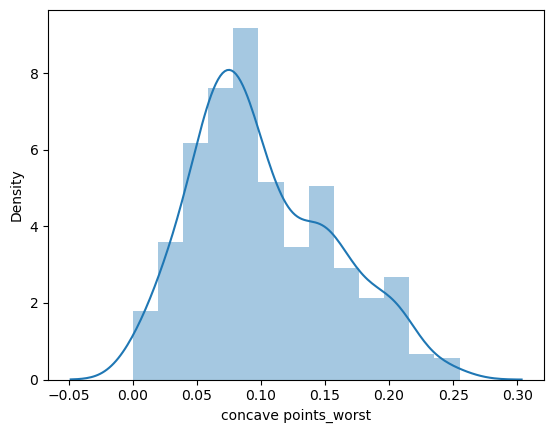

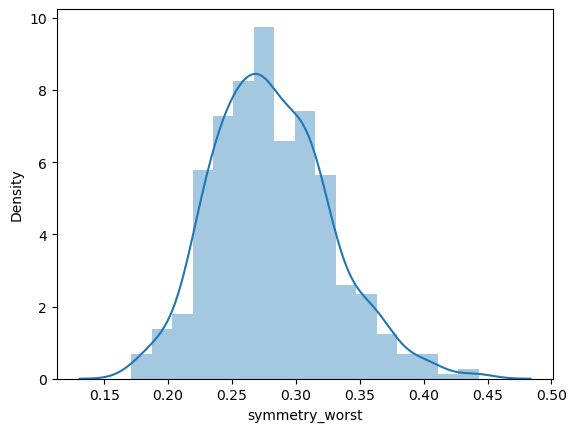

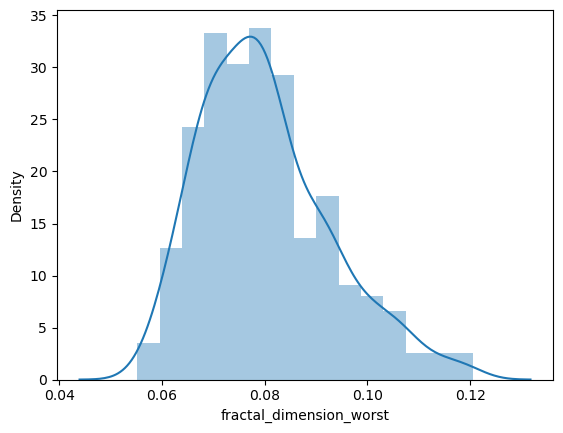

In [19]:
for i,j in df.items():
    if i != "diagnosis":
        sns.distplot(j)
        plt.show()

In [20]:
df["compactness_mean"]= np.log(1+df["compactness_mean"])
df["concave points_mean"]= np.log(1+df["concave points_mean"])
df["radius_se"]= np.log(1+df["radius_se"])
df["texture_se"]= np.log(1+df["texture_se"])
df["perimeter_se"]= np.log(1+df["perimeter_se"])
df["area_se"]= np.log(1+df["area_se"])
df["smoothness_se"]= np.log(1+df["smoothness_se"])
df["compactness_se"]= np.log(1+df["compactness_se"])
df["concavity_se"]= np.log(1+df["concavity_se"])
df["symmetry_se"]= np.log(1+df["symmetry_se"])
df["fractal_dimension_se"]= np.log(1+df["fractal_dimension_se"])
df["area_worst"]= np.log(1+df["area_worst"])
df["compactness_worst"]= np.log(1+df["compactness_worst"])
df["concave points_worst"]= np.log(1+df["concave points_worst"])

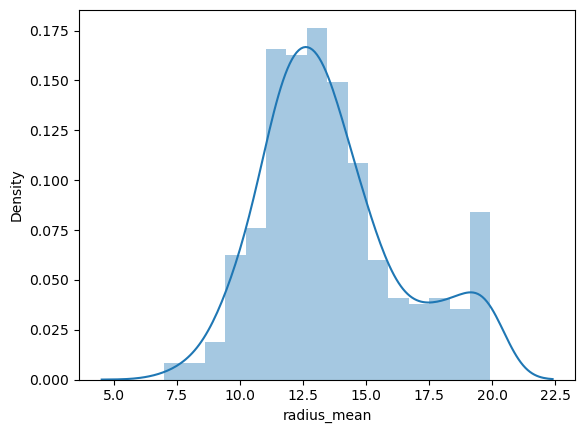

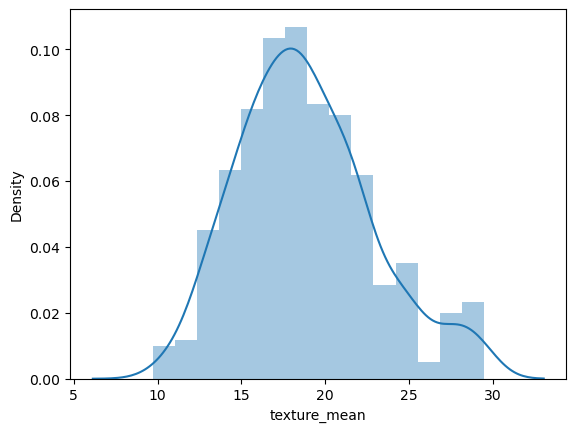

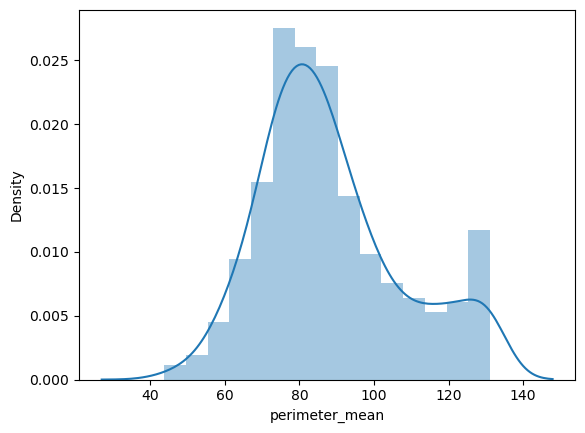

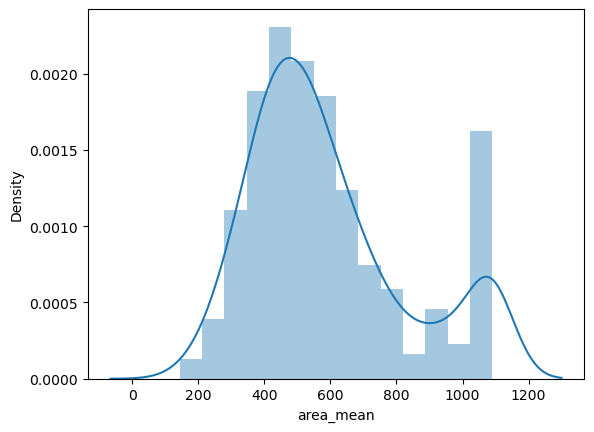

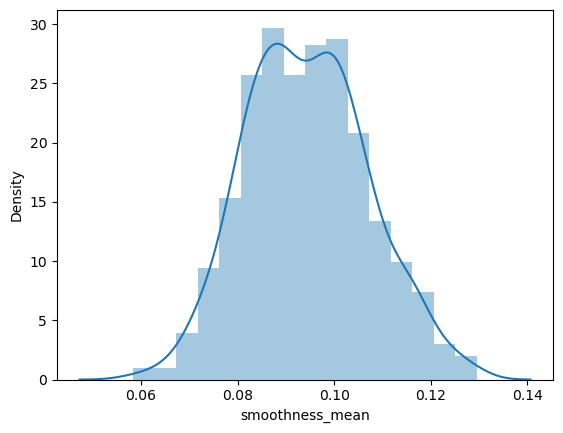

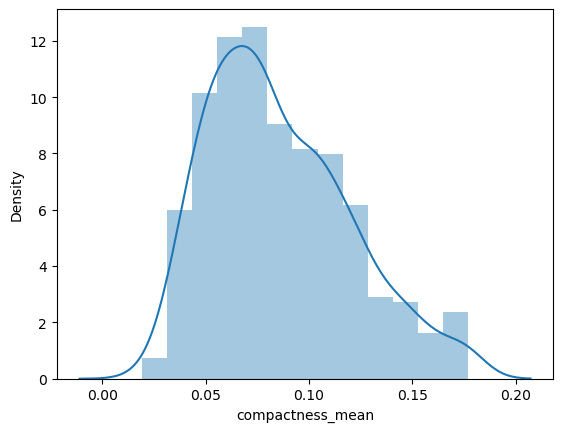

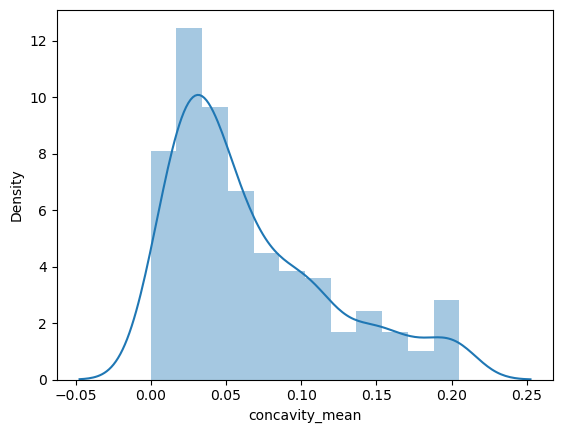

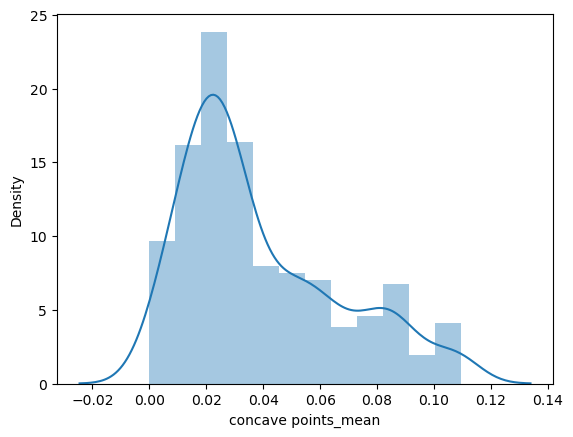

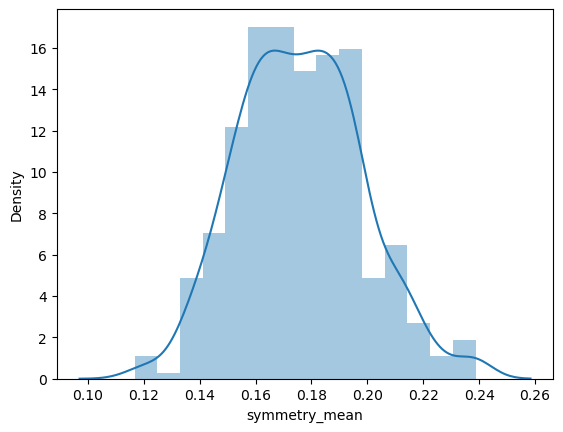

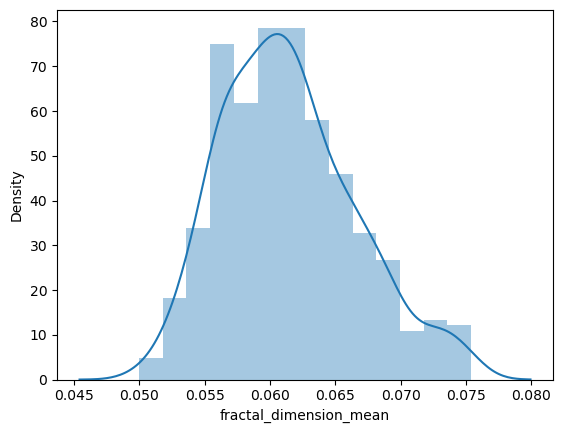

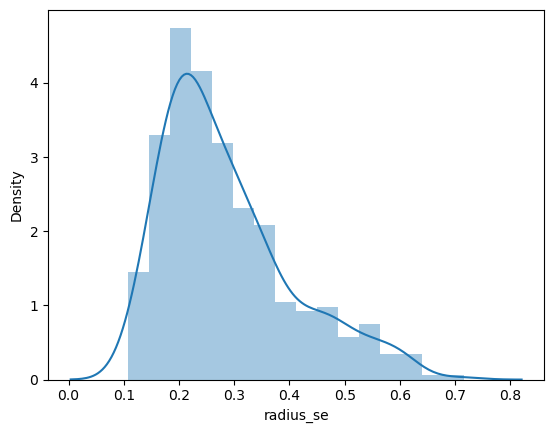

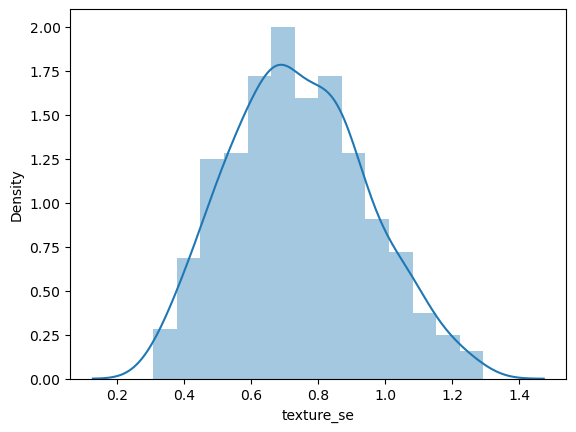

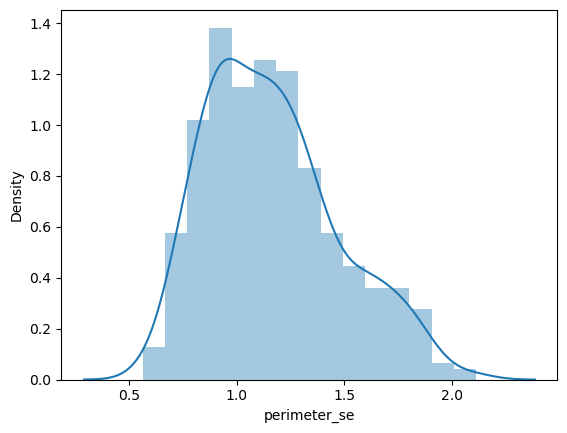

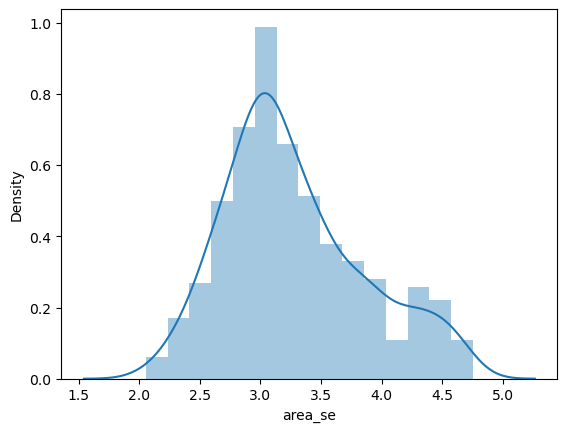

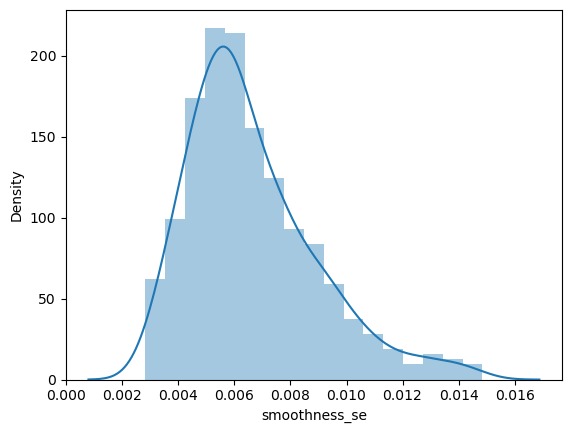

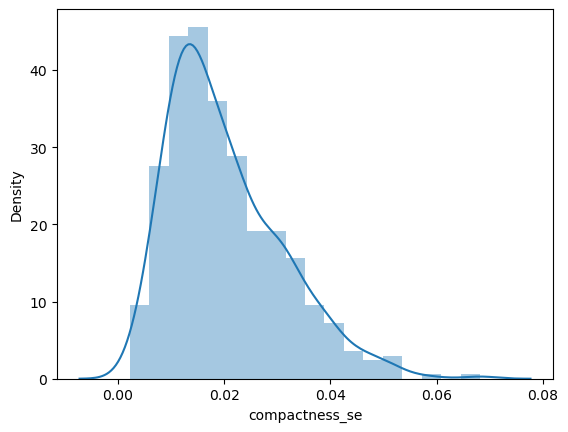

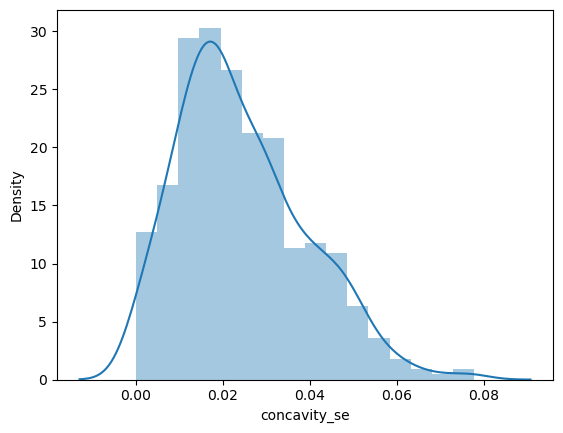

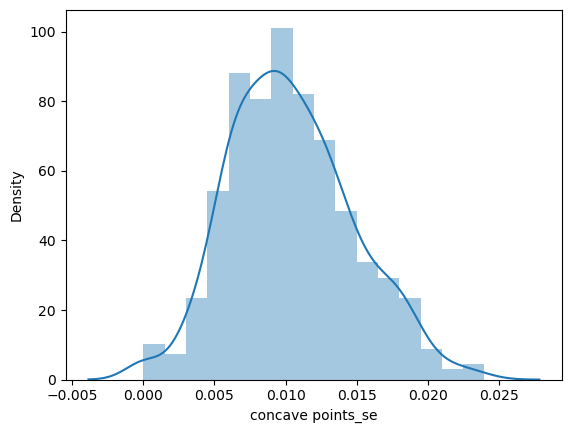

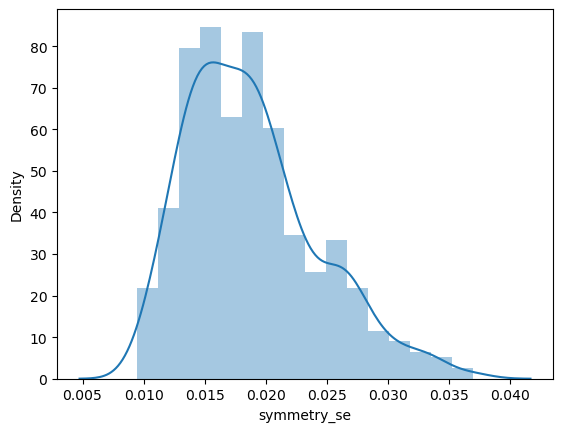

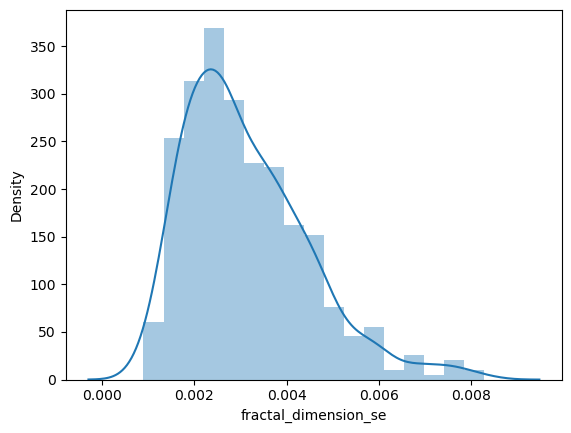

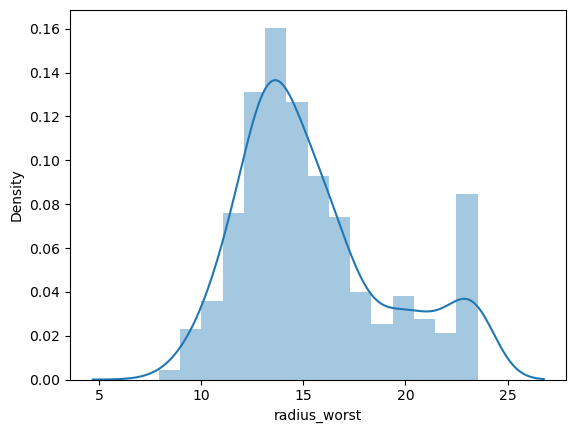

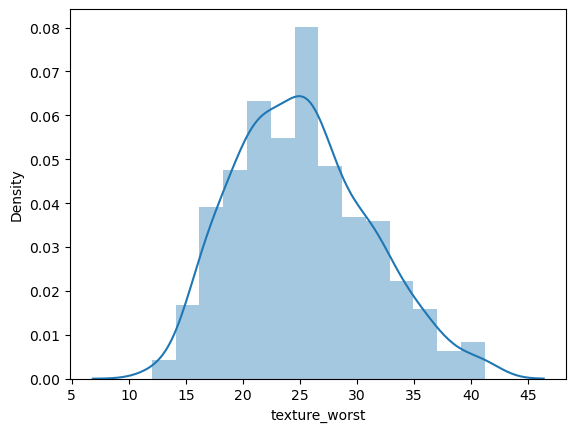

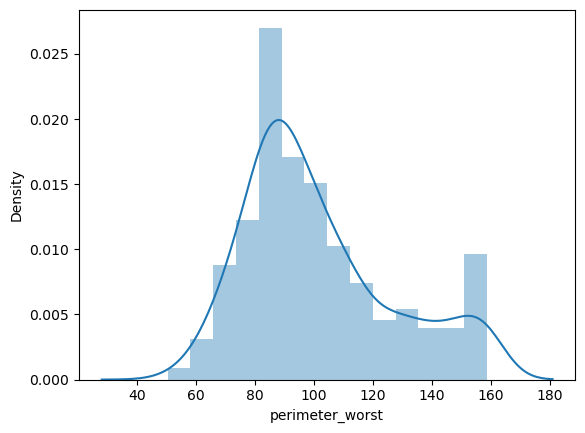

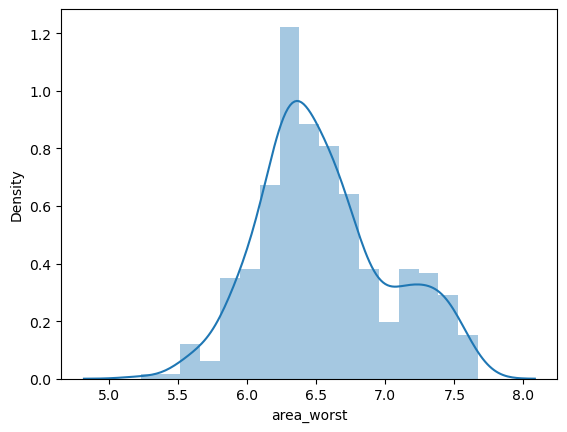

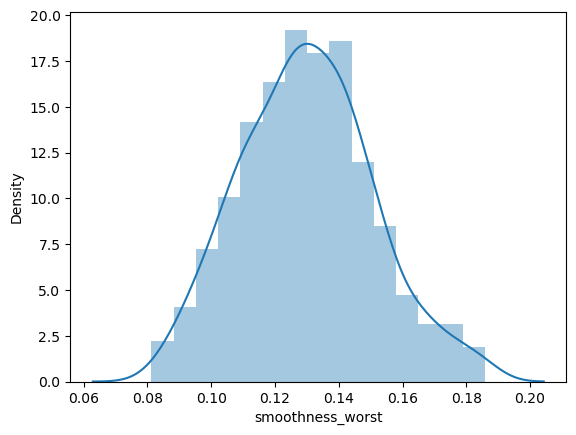

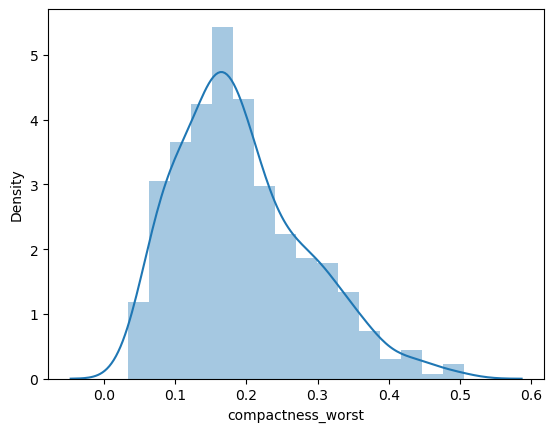

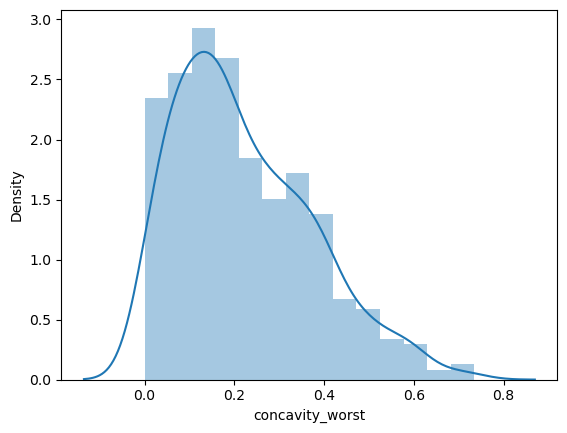

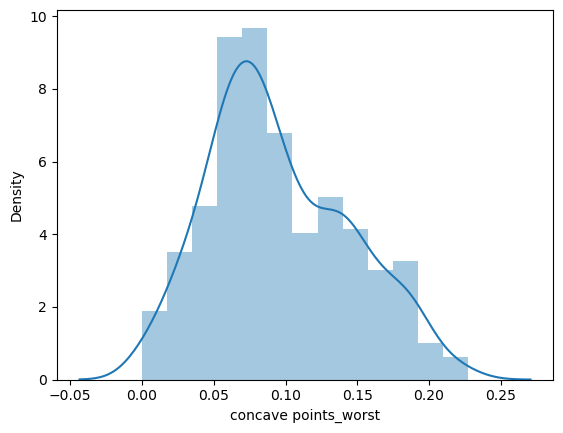

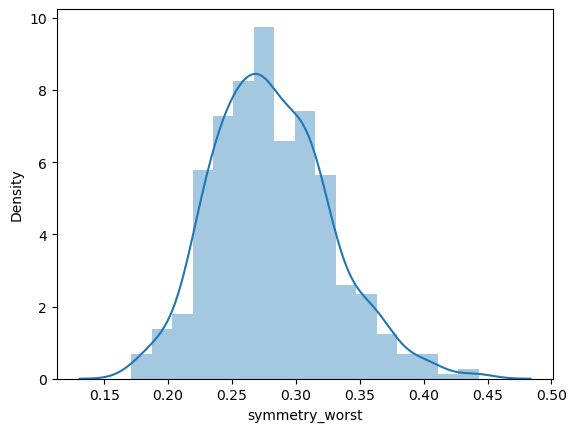

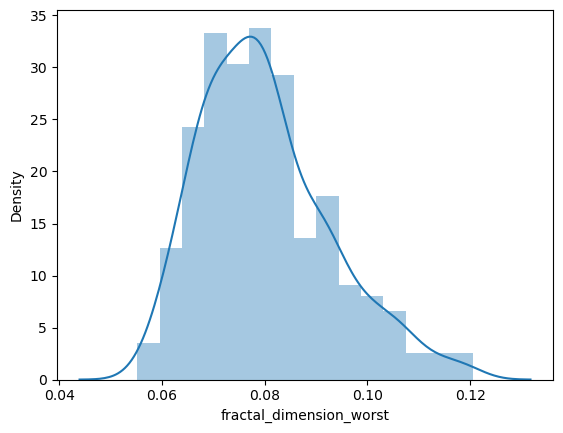

In [21]:
for i,j in df.items():
    if i != "diagnosis":
        sns.distplot(j)
        plt.show()

<AxesSubplot:>

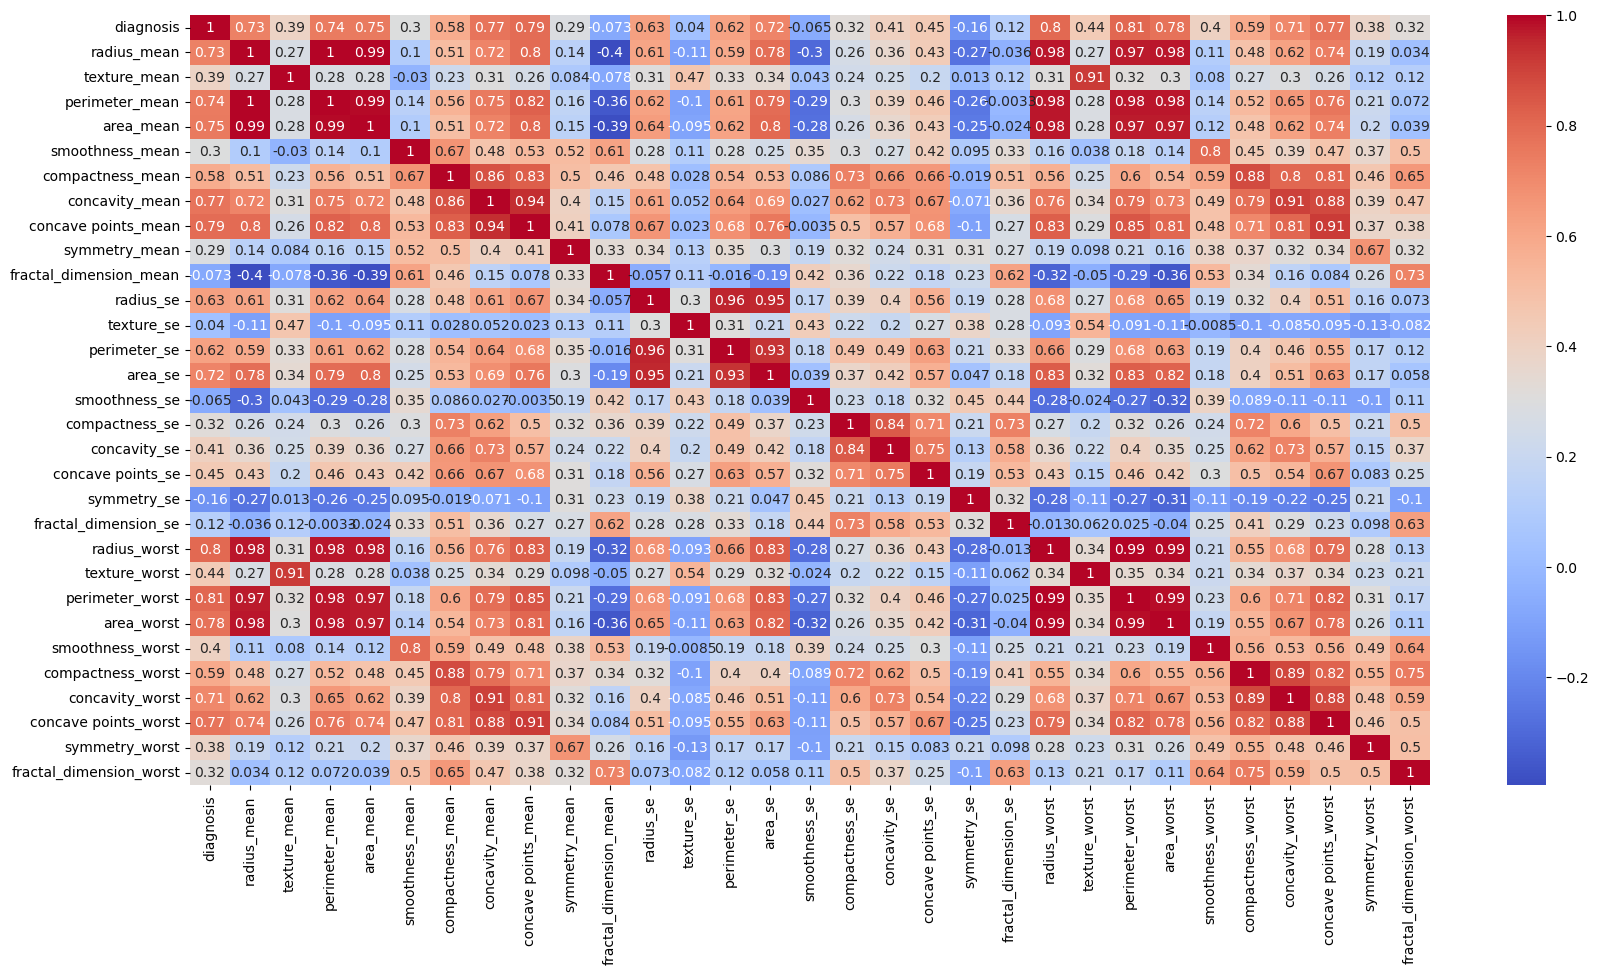

In [22]:
corr =df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [23]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [24]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=7,stratify=df["diagnosis"])

In [25]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
LG=LogisticRegression().fit(x_train,y_train)

In [26]:
def classification_logistic_evolution(x_test):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    from sklearn import metrics
    th=[]
    auc=[]
    acc=[]
    pre=[]
    re=[]
    f1=[]
    for j in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        y_pred_prob=LG.predict_proba(x_test)
        y_pred_prob_one=y_pred_prob[:,1]
        for i in range(0,len(y_pred_prob_one)):
            if (y_pred_prob_one[i]>=j):
                y_pred_prob_one[i]=1
            else:
                y_pred_prob_one[i]=0
        a=metrics.roc_auc_score(y_test,y_pred_prob_one)
        ac=metrics.accuracy_score(y_test,y_pred_prob_one)
        p=metrics.precision_score(y_test,y_pred_prob_one)
        r=metrics.recall_score(y_test,y_pred_prob_one)
        f=metrics.f1_score(y_test,y_pred_prob_one)
        th.append(j)
        auc.append(a)
        acc.append(ac)
        pre.append(p)
        re.append(r)
        f1.append(f)
    
    answer=pd.DataFrame({"Threshold":th,"AUC score":auc,"Accuracy":acc,"Precision":pre,"Recall":re,"f1 score":f1})
    return answer
classification_logistic_evolution(x_test)

,Threshold,AUC score,Accuracy,Precision,Recall,f1 score
0,0.0,0.500000,0.299270,0.299270,1.000000,0.460674
1,0.1,0.953125,0.934307,0.820000,1.000000,0.901099
2,0.2,0.963542,0.948905,0.854167,1.000000,0.921348
3,0.3,0.966972,0.963504,0.909091,0.975610,0.941176
4,0.4,0.966972,0.963504,0.909091,0.975610,0.941176
5,0.5,0.965193,0.970803,0.951220,0.951220,0.951220
6,0.6,0.970401,0.978102,0.975000,0.951220,0.962963
7,0.7,0.970401,0.978102,0.975000,0.951220,0.962963
8,0.8,0.970401,0.978102,0.975000,0.951220,0.962963
9,0.9,0.958206,0.970803,0.974359,0.926829,0.950000


In [27]:
from sklearn import metrics
y_pred_prob=LG.predict_proba(x_test)
y_pred_prob_one=y_pred_prob[:,1]
for i in range(0,len(y_pred_prob_one)):
    if (y_pred_prob_one[i]>=0.6):
        y_pred_prob_one[i]=1
    else:
        y_pred_prob_one[i]=0
print("AUC : ",metrics.roc_auc_score(y_test,y_pred_prob_one))
print("Classification report :\n",metrics.classification_report(y_test,y_pred_prob_one))

AUC :  0.9704014227642277
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        96
           1       0.97      0.95      0.96        41

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.97       137
weighted avg       0.98      0.98      0.98       137



In [28]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
knn=KNeighborsClassifier().fit(x_train,y_train)
def classification_knn_evolution(x_test):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    from sklearn import metrics
    th=[]
    auc=[]
    acc=[]
    pre=[]
    re=[]
    f1=[]
    for j in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        y_pred_prob=knn.predict_proba(x_test)
        y_pred_prob_one=y_pred_prob[:,1]
        for i in range(0,len(y_pred_prob_one)):
            if (y_pred_prob_one[i]>=j):
                y_pred_prob_one[i]=1
            else:
                y_pred_prob_one[i]=0
        a=metrics.roc_auc_score(y_test,y_pred_prob_one)
        ac=metrics.accuracy_score(y_test,y_pred_prob_one)
        p=metrics.precision_score(y_test,y_pred_prob_one)
        r=metrics.recall_score(y_test,y_pred_prob_one)
        f=metrics.f1_score(y_test,y_pred_prob_one)
        th.append(j)
        auc.append(a)
        acc.append(ac)
        pre.append(p)
        re.append(r)
        f1.append(f)
    
    answer=pd.DataFrame({"Threshold":th,"AUC score":auc,"Accuracy":acc,"Precision":pre,"Recall":re,"f1 score":f1})
    return answer
        
classification_knn_evolution(x_test)

,Threshold,AUC score,Accuracy,Precision,Recall,f1 score
0,0.0,0.500000,0.299270,0.299270,1.000000,0.460674
1,0.1,0.883638,0.846715,0.666667,0.975610,0.792079
2,0.2,0.883638,0.846715,0.666667,0.975610,0.792079
3,0.3,0.956555,0.948905,0.869565,0.975610,0.919540
4,0.4,0.956555,0.948905,0.869565,0.975610,0.919540
5,0.5,0.977388,0.978102,0.952381,0.975610,0.963855
6,0.6,0.977388,0.978102,0.952381,0.975610,0.963855
7,0.7,0.872840,0.919708,0.968750,0.756098,0.849315
8,0.8,0.872840,0.919708,0.968750,0.756098,0.849315
9,0.9,0.841463,0.905109,1.000000,0.682927,0.811594


In [29]:
from sklearn import metrics
y_pred_prob=knn.predict_proba(x_test)
y_pred_prob_one=y_pred_prob[:,1]
for i in range(0,len(y_pred_prob_one)):
    if (y_pred_prob_one[i]>=0.5):
        y_pred_prob_one[i]=1
    else:
        y_pred_prob_one[i]=0
print("AUC : ",metrics.roc_auc_score(y_test,y_pred_prob_one))
print("Classification report :\n",metrics.classification_report(y_test,y_pred_prob_one))

AUC :  0.9773882113821137
Classification report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        96
           1       0.95      0.98      0.96        41

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.97       137
weighted avg       0.98      0.98      0.98       137



In [30]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
GN=GaussianNB().fit(x_train,y_train)
def classification_knn_evolution(x_test):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    from sklearn import metrics
    th=[]
    auc=[]
    acc=[]
    pre=[]
    re=[]
    f1=[]
    for j in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        y_pred_prob=GN.predict_proba(x_test)
        y_pred_prob_one=y_pred_prob[:,1]
        for i in range(0,len(y_pred_prob_one)):
            if (y_pred_prob_one[i]>=j):
                y_pred_prob_one[i]=1
            else:
                y_pred_prob_one[i]=0
        a=metrics.roc_auc_score(y_test,y_pred_prob_one)
        ac=metrics.accuracy_score(y_test,y_pred_prob_one)
        p=metrics.precision_score(y_test,y_pred_prob_one)
        r=metrics.recall_score(y_test,y_pred_prob_one)
        f=metrics.f1_score(y_test,y_pred_prob_one)
        th.append(j)
        auc.append(a)
        acc.append(ac)
        pre.append(p)
        re.append(r)
        f1.append(f)
    
    answer=pd.DataFrame({"Threshold":th,"AUC score":auc,"Accuracy":acc,"Precision":pre,"Recall":re,"f1 score":f1})
    return answer
        
classification_knn_evolution(x_test)

,Threshold,AUC score,Accuracy,Precision,Recall,f1 score
0,0.0,0.500000,0.299270,0.299270,1.000000,0.460674
1,0.1,0.973958,0.963504,0.891304,1.000000,0.942529
2,0.2,0.979167,0.970803,0.911111,1.000000,0.953488
3,0.3,0.979167,0.970803,0.911111,1.000000,0.953488
4,0.4,0.979167,0.970803,0.911111,1.000000,0.953488
5,0.5,0.979167,0.970803,0.911111,1.000000,0.953488
6,0.6,0.979167,0.970803,0.911111,1.000000,0.953488
7,0.7,0.979167,0.970803,0.911111,1.000000,0.953488
8,0.8,0.979167,0.970803,0.911111,1.000000,0.953488
9,0.9,0.979167,0.970803,0.911111,1.000000,0.953488


In [31]:
from sklearn import metrics
y_pred_prob=GN.predict_proba(x_test)
y_pred_prob_one=y_pred_prob[:,1]
for i in range(0,len(y_pred_prob_one)):
    if (y_pred_prob_one[i]>=0.5):
        y_pred_prob_one[i]=1
    else:
        y_pred_prob_one[i]=0
print("AUC : ",metrics.roc_auc_score(y_test,y_pred_prob_one))
print("Classification report :\n",metrics.classification_report(y_test,y_pred_prob_one))

AUC :  0.9791666666666667
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        96
           1       0.91      1.00      0.95        41

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In [32]:
import pickle
pickle.dump(knn,open("diagnosis.pkl","wb"))

In [33]:
knn.predict(np.array([[11.32,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,0.05628,0.1210,0.8927,1.059,8.605,0.003653,0.016470,0.01633,0.003125,0.01537,0.002052,12.08,33.75,79.82,452.3,0.09203,0.14320,0.10890,0.02083,0.2849,0.07087]]))

array([0], dtype=int64)